In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ortools==9.9.3963

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show ortools cvxpy

Name: ortools
Version: 9.9.3963
Summary: Google OR-Tools python libraries and modules
Home-page: https://developers.google.com/optimization/
Author: Google LLC
Author-email: or-tools@google.com
License: Apache 2.0
Location: C:\Users\jesse\AppData\Roaming\Python\Python312\site-packages
Requires: absl-py, immutabledict, numpy, pandas, protobuf
Required-by: optbinning
---
Name: cvxpy
Version: 1.6.0
Summary: A domain-specific language for modeling convex optimization problems in Python.
Home-page: https://github.com/cvxpy/cvxpy
Author: 
Author-email: Steven Diamond <stevend2@stanford.edu>, akshayka@cs.stanford.edu, Eric Chu <echu508@stanford.edu>, Stephen Boyd <boyd@stanford.edu>
License: Apache License, Version 2.0
Location: C:\Users\jesse\AppData\Roaming\Python\Python312\site-packages
Requires: clarabel, numpy, osqp, scipy, scs
Required-by: ropwr
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install optbinning

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
import pandas as pd
import numpy as np

from itertools import combinations

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from xgboost import XGBClassifier

from optbinning import OptimalBinning

from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,  OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
 
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
train_df = pd.read_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//train.csv')
test_df = pd.read_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//test.csv')

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].agg(['mean', 'count'])

,Pclass,mean,count
0,1,0.629630,216
1,2,0.472826,184
2,3,0.242363,491


In [13]:
train_df.groupby(['Name'], as_index=False)['Survived'].agg(['mean', 'count'])

,Name,mean,count
0,"Abbing, Mr. Anthony",0.0,1
1,"Abbott, Mr. Rossmore Edward",0.0,1
2,"Abbott, Mrs. Stanton (Rosa Hunt)",1.0,1
3,"Abelson, Mr. Samuel",0.0,1
4,"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0,1
...,...,...,...
886,"de Mulder, Mr. Theodore",1.0,1
887,"de Pelsmaeker, Mr. Alfons",0.0,1
888,"del Carlo, Mr. Sebastiano",0.0,1
889,"van Billiard, Mr. Austin Blyler",0.0,1


In [14]:
train_df.groupby(['Sex'], as_index=False)['Survived'].agg(['mean', 'count'])

,Sex,mean,count
0,female,0.742038,314
1,male,0.188908,577


In [15]:
train_df.groupby(['Age'], as_index=False)['Survived'].agg(['mean', 'count'])

,Age,mean,count
0,0.42,1.0,1
1,0.67,1.0,1
2,0.75,1.0,2
3,0.83,1.0,2
4,0.92,1.0,1
...,...,...,...
83,70.00,0.0,2
84,70.50,0.0,1
85,71.00,0.0,2
86,74.00,0.0,1


In [16]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].agg(['mean', 'count'])

,SibSp,mean,count
0,0,0.345395,608
1,1,0.535885,209
2,2,0.464286,28
3,3,0.250000,16
4,4,0.166667,18
5,5,0.000000,5
6,8,0.000000,7


In [17]:
train_df.groupby(['Parch'], as_index=False)['Parch'].agg(['mean', 'count'])

,Parch,mean,count
0,0,0.0,678
1,1,1.0,118
2,2,2.0,80
3,3,3.0,5
4,4,4.0,4
5,5,5.0,5
6,6,6.0,1


In [18]:
train_df.groupby(['Ticket'], as_index=False)['Survived'].agg(['mean', 'count'])

,Ticket,mean,count
0,110152,1.000000,3
1,110413,0.666667,3
2,110465,0.000000,2
3,110564,1.000000,1
4,110813,1.000000,1
...,...,...,...
676,W./C. 6608,0.000000,4
677,W./C. 6609,0.000000,1
678,W.E.P. 5734,0.000000,1
679,W/C 14208,0.000000,1


In [19]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['mean', 'count'])

,Cabin,mean,count
0,A10,0.0,1
1,A14,0.0,1
2,A16,1.0,1
3,A19,0.0,1
4,A20,1.0,1
...,...,...,...
142,F33,1.0,3
143,F38,0.0,1
144,F4,1.0,2
145,G6,0.5,4


In [20]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].agg(['mean', 'count'])

,Embarked,mean,count
0,C,0.553571,168
1,Q,0.389610,77
2,S,0.336957,644


In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
def cv_cat_to_binary(train_df, test_df, feature_column, target_column, cramer_v_threshold=0.00, n_splits=5, random_state=42, save_onehotvariables=True):
    """
    Perform cross-validated analysis of one-hot encoded variables, compute Cramér's V,
    filter by a threshold, and optionally save results to both train_df and test_df.
    Also, produce a clustered bar chart comparing feature_column categories with target_column categories.

    Parameters:
    train_df (pd.DataFrame): Training DataFrame for cross-validation and analysis.
    test_df (pd.DataFrame): Test DataFrame to save selected variables.
    feature_column (str): Column to one-hot encode and evaluate.
    target_column (str): Target categorical column.
    cramer_v_threshold (float): Threshold for Cramér's V to retain variables. Default is 0.00.
    n_splits (int): Number of cross-validation splits. Default is 5.
    random_state (int): Random state for reproducibility. Default is 42.
    save_onehotvariables (bool): Whether to save the resulting one-hot variables. Default is True.

    Returns:
    pd.DataFrame: DataFrame with cross-validated Cramér's V and p-values for each variable.
    """
    # One-hot encode the training dataset
    train_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    train_encoded = train_encoder.fit_transform(train_df[[feature_column]])
    train_encoded_columns = [f"{feature_column}_{cat}" for cat in train_encoder.categories_[0]]
    train_encoded_df = pd.DataFrame(train_encoded, columns=train_encoded_columns, index=train_df.index)

    # Prepare for cross-validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    results = {col: {"CramersV": [], "PValue": []} for col in train_encoded_columns}

    # Create contingency table for the entire training dataset
    contingency_table = pd.crosstab(train_df[feature_column], train_df[target_column], normalize="index")

    # Iterate through each fold
    for _, test_idx in skf.split(train_df, train_df[target_column]):
        test_df_fold = train_df.iloc[test_idx]
        test_encoded = train_encoded_df.iloc[test_idx]

        # Calculate Cramér's V and p-values for each one-hot encoded variable
        for column in test_encoded.columns:
            fold_contingency_table = pd.crosstab(test_df_fold[target_column], test_encoded[column])
            chi2, p_value, _, _ = chi2_contingency(fold_contingency_table, correction=False)
            n = fold_contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * (min(fold_contingency_table.shape) - 1)))

            results[column]["CramersV"].append(cramers_v)
            results[column]["PValue"].append(p_value)

    # Aggregate results and identify retained variables
    retained_columns = []
    for column, metrics in results.items():
        mean_cramers_v = np.mean(metrics["CramersV"])
        if mean_cramers_v >= cramer_v_threshold:
            retained_columns.append(column)

    # Only save the retained variables if save_onehotvariables is True
    if save_onehotvariables:
        # Filter the training dataset for retained variables
        filtered_train_df = train_encoded_df[retained_columns]
        train_df[retained_columns] = filtered_train_df

        # One-hot encode the test dataset
        test_encoded = train_encoder.transform(test_df[[feature_column]])
        test_encoded_df = pd.DataFrame(test_encoded, columns=train_encoded_columns, index=test_df.index)

        # Add missing columns to the test dataset and set them to zero
        for column in train_encoded_columns:
            if column not in test_encoded_df.columns:
                test_encoded_df[column] = 0

        # Filter the test dataset for retained variables
        filtered_test_df = test_encoded_df[retained_columns]
        test_df[retained_columns] = filtered_test_df

    # Create a clustered bar chart
    contingency_table.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f'Category Proportions for {feature_column} vs {target_column}')
    plt.xlabel(feature_column)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title=target_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Prepare output for cross-validated results
    final_results = []
    for column, metrics in results.items():
        final_results.append({
            "Variable": column,
            "Mean_CramersV": np.mean(metrics["CramersV"]),
            "Mean_PValue": np.mean(metrics["PValue"])
        })

    return pd.DataFrame(final_results)

In [23]:
def cv_numeric_to_binary(data, numeric_var, binary_target, n_folds=5, hist_bins=15, iqr_threshold=1.5, z_score_threshold=3):
    """
    Perform Kendall's Tau correlation with outlier detection and cross-validation.

    Parameters:
        data (pd.DataFrame): DataFrame containing the numeric variable and binary target.
        numeric_var (str): Column name of the numeric variable.
        binary_target (str): Column name of the binary target variable.
        n_folds (int): Number of folds for cross-validation (default: 5).
        hist_bins (int): Number of bins for the histogram (default: 15).
        iqr_threshold (float): Threshold for IQR-based outlier detection (default: 1.5).
        z_score_threshold (float): Threshold for Z-score-based outlier detection (default: 3).

    Returns:
        results (dict): Summary of Kendall's Tau values and p-values across folds.
    """
    from scipy.stats import combine_pvalues

    # Outlier detection
    def detect_outliers(data, column, iqr_threshold, z_score_threshold):
        # IQR-based outlier detection
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_threshold * iqr
        upper_bound = q3 + iqr_threshold * iqr
        iqr_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

        # Z-score-based outlier detection
        mean = data[column].mean()
        std = data[column].std()
        z_scores = (data[column] - mean) / std
        zscore_outliers = data[(z_scores < -z_score_threshold) | (z_scores > z_score_threshold)]

        median = data[column].median()
        iqr_below_median = iqr_outliers[iqr_outliers[column] < median]
        iqr_above_median = iqr_outliers[iqr_outliers[column] > median]

        zscore_below_median = zscore_outliers[zscore_outliers[column] < median]
        zscore_above_median = zscore_outliers[zscore_outliers[column] > median]

        return {
            "IQR Outliers": {
                "Total": len(iqr_outliers),
                "Below Median": len(iqr_below_median),
                "Above Median": len(iqr_above_median)
            },
            "Z-Score Outliers": {
                "Total": len(zscore_outliers),
                "Below Median": len(zscore_below_median),
                "Above Median": len(zscore_above_median)
            }
        }

    # Detect outliers and print summary
    outlier_summary = detect_outliers(data, numeric_var, iqr_threshold=iqr_threshold, z_score_threshold=z_score_threshold)
    print(f"Outlier Summary for {numeric_var}: {outlier_summary}")

    # Cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    tau_results = []
    p_values = []
    test_data_averages = []

    for train_idx, test_idx in kf.split(data):
        # Split data into train and test sets
        test_data = data.iloc[test_idx]

        # Store test data for averaging histograms
        test_data_averages.append(test_data)

        # Calculate Kendall's Tau on the training set
        train_data = data.iloc[train_idx]
        tau, p_value = kendalltau(train_data[numeric_var], train_data[binary_target])
        tau_results.append(tau)
        p_values.append(p_value)

    # Combine all test data for histograms
    combined_test_data = pd.concat(test_data_averages)
    group_0 = combined_test_data[combined_test_data[binary_target] == 0][numeric_var]
    group_1 = combined_test_data[combined_test_data[binary_target] == 1][numeric_var]

    # Generate histograms for combined test data
    plt.figure(figsize=(6, 4))
    plt.hist(group_0, bins=hist_bins, alpha=0.6, color='blue', edgecolor='black')
    plt.xlabel(numeric_var)
    plt.ylabel('Frequency')
    plt.title(f'Combined Distribution of {numeric_var} for Target = 0')
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.hist(group_1, bins=hist_bins, alpha=0.6, color='orange', edgecolor='black')
    plt.xlabel(numeric_var)
    plt.ylabel('Frequency')
    plt.title(f'Combined Distribution of {numeric_var} for Target = 1')
    plt.show()

    # Summarize results
    mean_tau = np.mean(tau_results)
    combined_p_value = combine_pvalues(p_values)[1]

    # Guidelines for interpretation
    interpretation_guidelines = [
        "< 0.1 = Very Weak Association",
        "0.0 - 0.3 = Weak Association",
        "0.3 - 0.5 = Moderate Association",
        "> 0.5 = Strong Association"
    ]

    results = {
        "Mean Kendall's Tau": mean_tau,
        "Combined P-value": combined_p_value,
        "Interpretation Guidelines": interpretation_guidelines,
        "Outlier Summary": outlier_summary
    }

    return results

In [24]:
from sklearn.model_selection import StratifiedKFold
from optbinning import OptimalBinning
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import product

def cv_opt_bin(train_df, test_df, numeric_variable, binary_target, n_splits=5, random_state=42, save_binned_variable=False):
    """
    Find the optimal binning strategy for a numeric feature to predict a binary target using OptimalBinning and Kendall's Tau.
    Includes hyperparameter tuning using grid search.

    Parameters:
        train_df (DataFrame): Training data containing the numeric feature and binary target.
        test_df (DataFrame): Test data to apply the same binning strategy.
        numeric_variable (str): Name of the numeric feature column in the DataFrame.
        binary_target (str): Name of the binary target column in the DataFrame.
        n_splits (int): Number of cross-validation splits (default: 5).
        random_state (int): Random state for reproducibility (default: 42).
        save_binned_variable (bool): Whether to save the binned variable back to the DataFrames (default: False).

    Returns:
        dict: A dictionary with the following keys:
            - "optimal_binning": The fitted OptimalBinning object with the best hyperparameters.
            - "mean_tau": Mean Kendall's Tau across all cross-validation splits.
            - "mean_p_value": Mean p-value across all cross-validation splits.
            - "best_hyperparameters": Dictionary of the best hyperparameters found.
    """
    X = train_df[numeric_variable].values
    y = train_df[binary_target].values

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Define grid search for hyperparameters
    hyperparameter_grid = {
        "prebinning_method": ["cart", "mdlp"],
        "max_n_prebins": [10, 20, 30, 50, 100],
        "min_prebin_size": [0.05, 0.1, 0.2],
        "min_bin_size": [0.05, 0.1, 0.2],
        "monotonic_trend": ["auto", "ascending", "descending"]
    }

    # Generate all combinations of hyperparameters
    hyperparameter_combinations = list(product(*hyperparameter_grid.values()))
    best_tau = -np.inf
    best_p_value = None
    best_hyperparameters = None
    best_optb = None

    for hyperparameters in hyperparameter_combinations:
        # Extract hyperparameters
        params = dict(zip(hyperparameter_grid.keys(), hyperparameters))

        taus = []
        p_values = []

        for train_idx, val_idx in cv.split(X.reshape(-1, 1), y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Train OptimalBinning with current hyperparameters
            optb = OptimalBinning(
                prebinning_method=params["prebinning_method"],
                max_n_prebins=params["max_n_prebins"],
                min_prebin_size=params["min_prebin_size"],
                min_bin_size=params["min_bin_size"],
                monotonic_trend=params["monotonic_trend"]
            )
            optb.fit(X_train, y_train)

            # Bin the validation set
            binned = optb.transform(X_val)

            # Calculate Kendall's Tau
            tau, p_value = kendalltau(binned, y_val)
            taus.append(tau)
            p_values.append(p_value)

        mean_tau = np.mean(taus)
        mean_p = np.mean(p_values)

        # Update the best hyperparameters if current mean_tau is better
        if mean_tau > best_tau:
            best_tau = mean_tau
            best_p_value = mean_p
            best_hyperparameters = params
            best_optb = optb

    # Fit the best model on the entire training set
    best_optb.fit(X, y)

    # Apply binning to both training and test sets
    train_df[f"binned_{numeric_variable}"] = best_optb.transform(X)
    test_X = test_df[numeric_variable].values
    test_df[f"binned_{numeric_variable}"] = best_optb.transform(test_X)

    # Plot histograms for the binned variable for each state of the binary target in the train set
    binned_variable = train_df[f"binned_{numeric_variable}"]
    for target_value in [0, 1]:
        subset = binned_variable[train_df[binary_target] == target_value]
        if not subset.empty:
            plt.figure()
            plt.hist(subset, bins=np.arange(subset.min(), subset.max() + 2) - 0.5, edgecolor="black")
            plt.title(f"Binned {numeric_variable} for Target = {target_value}")
            plt.xlabel("Binned Value")
            plt.ylabel("Frequency")
            plt.show()

    # Scatterplot with regression line
    if not binned_variable.empty:
        plt.figure(figsize=(6, 4))
        regression = LinearRegression()
        regression.fit(binned_variable.values.reshape(-1, 1), train_df[binary_target].values)
        predicted = regression.predict(binned_variable.values.reshape(-1, 1))

        plt.scatter(binned_variable, train_df[binary_target], alpha=0.6, label="Data Points")
        plt.plot(binned_variable, predicted, color="red", label="Regression Line")
        plt.xlabel(f"Binned {numeric_variable}")
        plt.ylabel(binary_target)
        plt.title(f"Scatterplot: Binned {numeric_variable} vs {binary_target}")
        plt.legend()
        plt.show()

    # Return results as a dictionary
    return {
        "optimal_binning": best_optb,
        "mean_tau": best_tau,
        "mean_p_value": best_p_value,
        "best_hyperparameters": best_hyperparameters
    }



In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

def cv_freq_encode(data, cat_feature, binary_target, n_splits=5, random_state=42, save_feature=False):
    """
    Cross-validates frequency encoding, calculates Kendall's Tau and p-values,
    generates histograms for each condition (0 and 1) of the binary target,
    and optionally saves the frequency-encoded values back to the input dataset.
    
    Parameters:
    - data: DataFrame
    - cat_feature: Column name of the categorical feature to frequency encode
    - binary_target: Column name of the binary target variable
    - n_splits: Number of cross-validation splits
    - random_state: Random state for reproducibility
    - save_feature: If True, saves the cross-validated frequencies as a new column in the dataset
    
    Returns:
    - A dictionary with frequency-encoded data, binary target values, histogram, and Kendall's Tau
    """
    # Handle missing values in the categorical feature
    if data[cat_feature].isnull().any():
        min_val, max_val = data[cat_feature].min(), data[cat_feature].max()
        random_values = np.random.uniform(low=min_val, high=max_val, size=data[cat_feature].isnull().sum())
        data.loc[data[cat_feature].isnull(), cat_feature] = random_values
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    freq_encoded_all_folds = []
    target_all_folds = []

    for train_idx, test_idx in kf.split(data):
        train_data = data.iloc[train_idx]
        test_data = data.iloc[test_idx]
        
        # Frequency encoding
        frequency = train_data[cat_feature].value_counts(normalize=True)
        test_data[f"{cat_feature}_freq"] = test_data[cat_feature].map(frequency).fillna(0)
        
        # Append frequency-encoded and target data for all folds
        freq_encoded_all_folds.append(test_data[f"{cat_feature}_freq"])
        target_all_folds.append(test_data[binary_target])
    
    # Combine frequency-encoded values and targets from all folds
    freq_encoded_combined = pd.concat(freq_encoded_all_folds).sort_index()
    target_combined = pd.concat(target_all_folds).sort_index()

    # Optionally save the feature back to the dataset
    if save_feature:
        data[f"{cat_feature}_cv_freq"] = freq_encoded_combined

    # Calculate Kendall's Tau
    kendall_tau, p_value = kendalltau(freq_encoded_combined, target_combined)

    # Generate histograms
    fig, (ax_hist_0, ax_hist_1) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    # Histogram for target = 0
    freq_encoded_0 = freq_encoded_combined[target_combined == 0]
    ax_hist_0.hist(
        freq_encoded_0,
        bins=np.arange(0, 1.05, 0.05),  # Set bins for frequencies between 0 and 1
        color="blue",
        alpha=0.7
    )
    ax_hist_0.set_title("Histogram of Frequency-Encoded Values (Target = 0)")
    ax_hist_0.set_xlabel(f"Frequency-Encoded {cat_feature}")
    ax_hist_0.set_ylabel("Count")
    
    # Histogram for target = 1
    freq_encoded_1 = freq_encoded_combined[target_combined == 1]
    ax_hist_1.hist(
        freq_encoded_1,
        bins=np.arange(0, 1.05, 0.05),  # Set bins for frequencies between 0 and 1
        color="green",
        alpha=0.7
    )
    ax_hist_1.set_title("Histogram of Frequency-Encoded Values (Target = 1)")
    ax_hist_1.set_xlabel(f"Frequency-Encoded {cat_feature}")
    
    # Display histograms
    plt.tight_layout()
    plt.show()
    
    return {
        "kendall_tau": kendall_tau,
        "p_value": p_value,
        "histogram": fig,
    }

In [26]:
train_df.describe(include = ['O']) # research

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


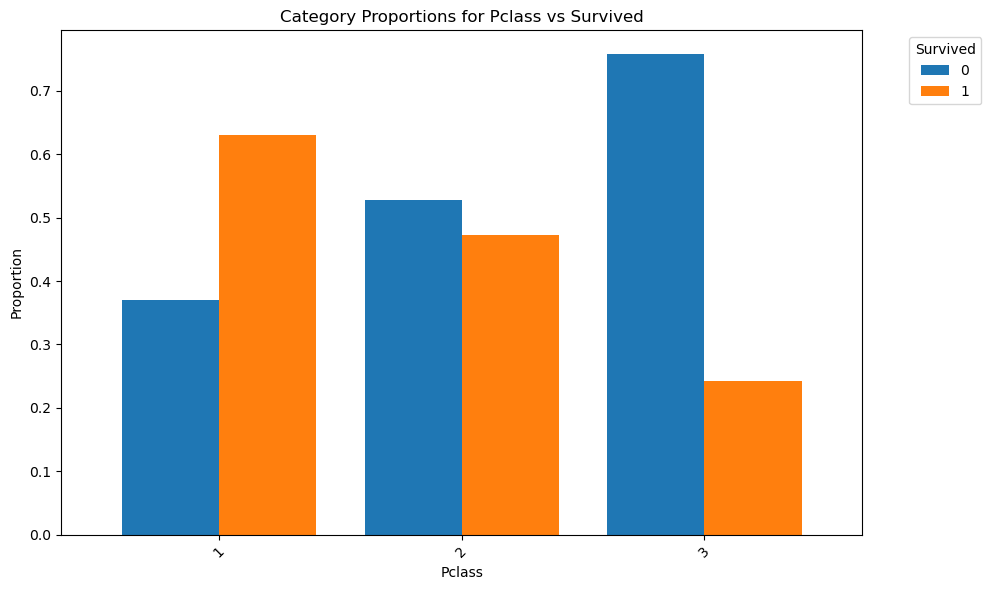

,Variable,Mean_CramersV,Mean_PValue
0,Pclass_1,0.285845,0.000382
1,Pclass_2,0.095103,0.336176
2,Pclass_3,0.322673,0.000236


In [27]:
cv_cat_to_binary(train_df, test_df, 'Pclass', 'Survived', cramer_v_threshold=0.10, n_splits=5, random_state=42, save_onehotvariables=True)

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Pclass_1     891 non-null    float64
 13  Pclass_3     891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


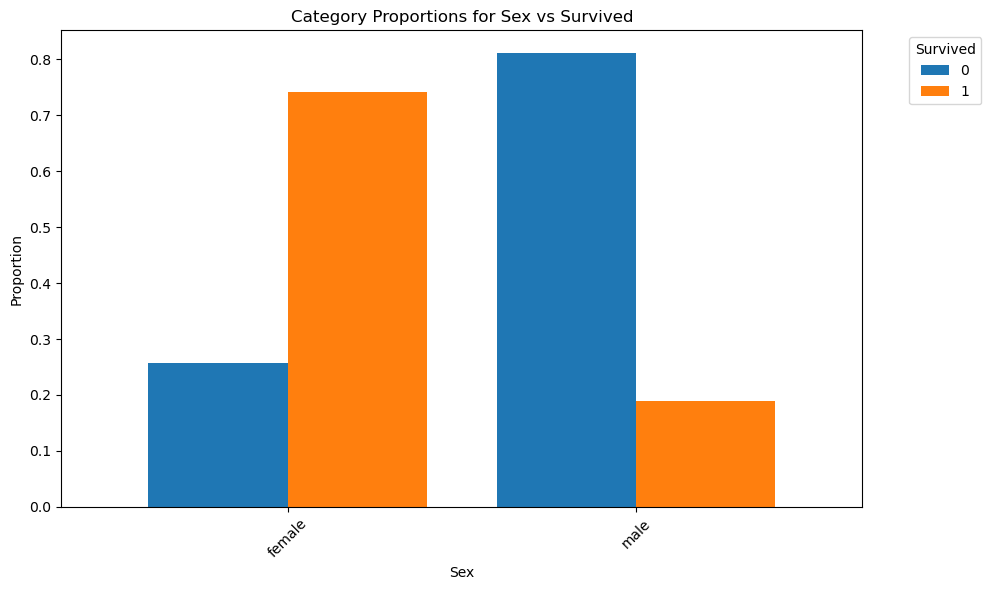

,Variable,Mean_CramersV,Mean_PValue
0,Sex_female,0.544184,6.537289e-12
1,Sex_male,0.544184,6.537289e-12


In [29]:
cv_cat_to_binary(train_df, test_df, 'Sex', 'Survived', cramer_v_threshold=0.10, n_splits=5, random_state=42, save_onehotvariables=True)

Outlier Summary for SibSp: {'IQR Outliers': {'Total': 46, 'Below Median': 0, 'Above Median': 46}, 'Z-Score Outliers': {'Total': 30, 'Below Median': 0, 'Above Median': 30}}


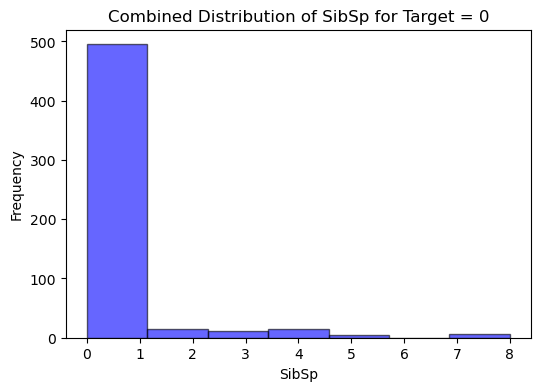

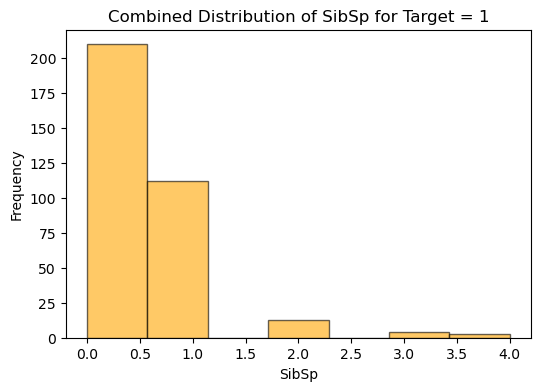

{"Mean Kendall's Tau": 0.0860280939298943,
 'Combined P-value': 1.0502020668788721e-05,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 46,
   'Below Median': 0,
   'Above Median': 46},
  'Z-Score Outliers': {'Total': 30, 'Below Median': 0, 'Above Median': 30}}}

In [30]:
cv_numeric_to_binary(train_df, 'SibSp', 'Survived', n_folds=5, hist_bins=7, iqr_threshold=1.5, z_score_threshold=3)

Outlier Summary for SibSp: {'IQR Outliers': {'Total': 46, 'Below Median': 0, 'Above Median': 46}, 'Z-Score Outliers': {'Total': 30, 'Below Median': 0, 'Above Median': 30}}


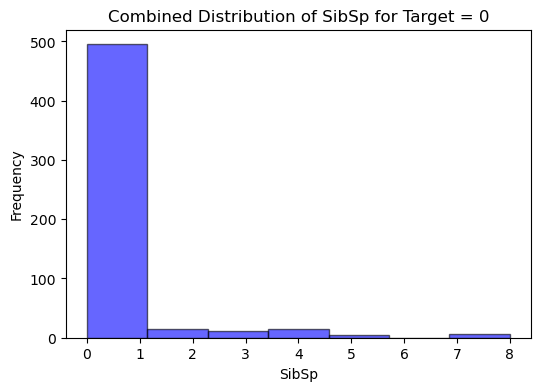

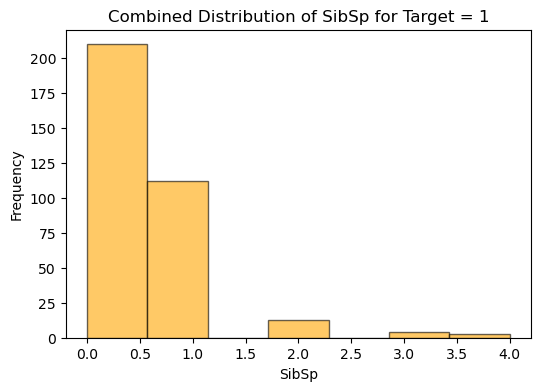

{"Mean Kendall's Tau": 0.0860280939298943,
 'Combined P-value': 1.0502020668788721e-05,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 46,
   'Below Median': 0,
   'Above Median': 46},
  'Z-Score Outliers': {'Total': 30, 'Below Median': 0, 'Above Median': 30}}}

In [31]:
cv_numeric_to_binary(train_df, 'SibSp', 'Survived', n_folds=5, hist_bins=7, iqr_threshold=1.5, z_score_threshold=3)

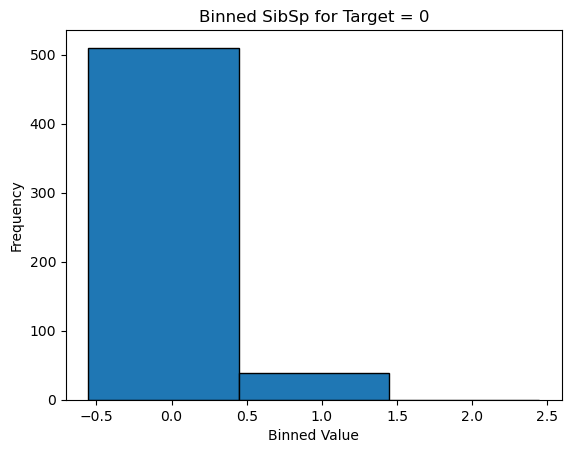

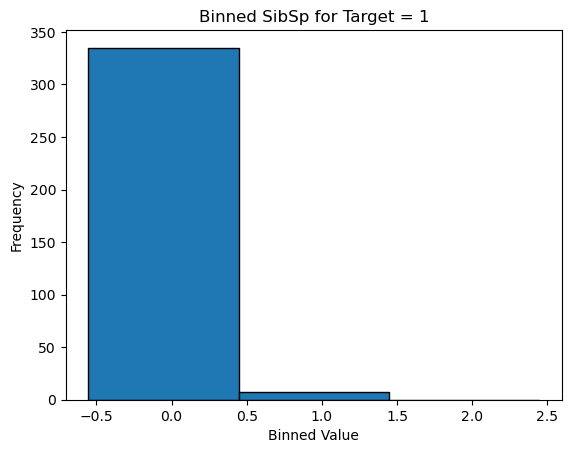

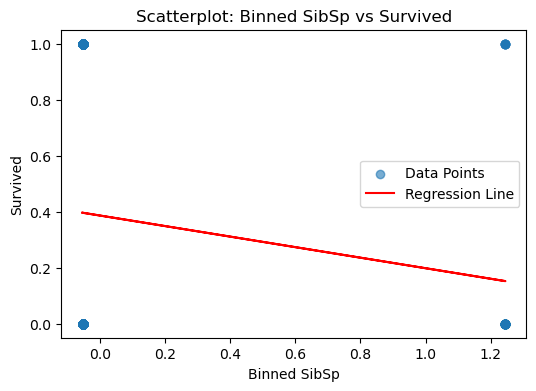

{'optimal_binning': OptimalBinning(max_n_prebins=10, min_bin_size=0.05,
                monotonic_trend='descending'),
 'mean_tau': -0.0915580133407328,
 'mean_p_value': 0.3339151838012575,
 'best_hyperparameters': {'prebinning_method': 'cart',
  'max_n_prebins': 10,
  'min_prebin_size': 0.05,
  'min_bin_size': 0.05,
  'monotonic_trend': 'descending'}}

In [32]:
cv_opt_bin(train_df, test_df, 'SibSp', 'Survived', n_splits=5, random_state=42, save_binned_variable=False)

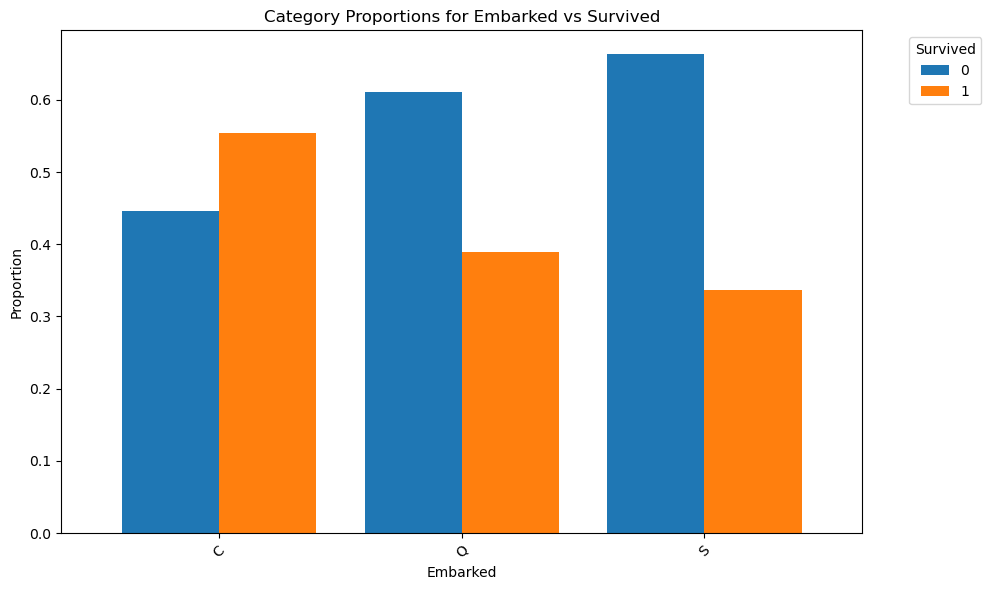

,Variable,Mean_CramersV,Mean_PValue
0,Embarked_C,0.169642,0.081260
1,Embarked_Q,0.062010,0.453982
2,Embarked_S,0.155522,0.056089
3,Embarked_nan,NaN,0.681934


In [33]:
cv_cat_to_binary(train_df, test_df, 'Embarked', 'Survived', cramer_v_threshold=0.10, n_splits=5, random_state=42, save_onehotvariables=True)

In [34]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [35]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_3,Sex_female,Sex_male,binned_SibSp,Embarked_C,Embarked_S,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,1.0,-0.053008,0.0,1.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,-0.053008,1.0,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,1.0,0.0,-0.053008,0.0,1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,1.0,0.0,-0.053008,0.0,1.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,1.0,-0.053008,0.0,1.0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,1.0,0.0,1.0,-0.053008,0.0,0.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0,0.0,0.0,1.0,-0.053008,0.0,1.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,1.0,0.0,1.0,1.244364,0.0,1.0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.0,1.0,1.0,0.0,-0.053008,0.0,1.0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0,0.0,1.0,0.0,-0.053008,1.0,0.0,2


In [36]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].agg(['mean', 'count'])

,Family_Size,mean,count
0,1,0.303538,537
1,2,0.552795,161
2,3,0.578431,102
3,4,0.724138,29
4,5,0.200000,15
5,6,0.136364,22
6,7,0.333333,12
7,8,0.000000,6
8,11,0.000000,7


Outlier Summary for Family_Size: {'IQR Outliers': {'Total': 91, 'Below Median': 0, 'Above Median': 91}, 'Z-Score Outliers': {'Total': 25, 'Below Median': 0, 'Above Median': 25}}


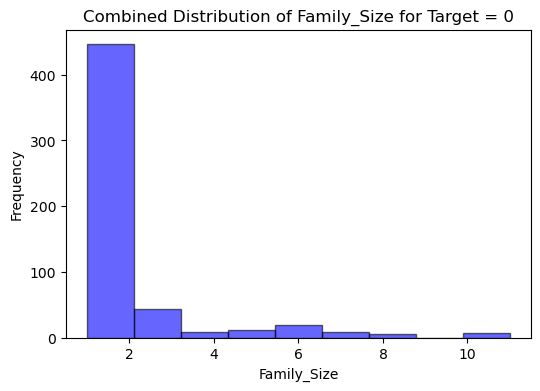

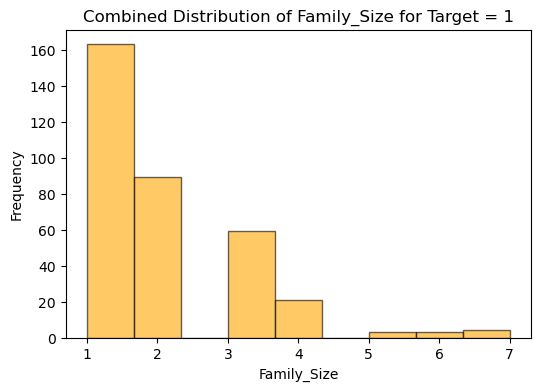

{"Mean Kendall's Tau": 0.15480192840106344,
 'Combined P-value': 4.2780556053828727e-20,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 91,
   'Below Median': 0,
   'Above Median': 91},
  'Z-Score Outliers': {'Total': 25, 'Below Median': 0, 'Above Median': 25}}}

In [37]:
cv_numeric_to_binary(train_df, 'Family_Size', 'Survived', n_folds=5, hist_bins=9, iqr_threshold=1.5, z_score_threshold=3)

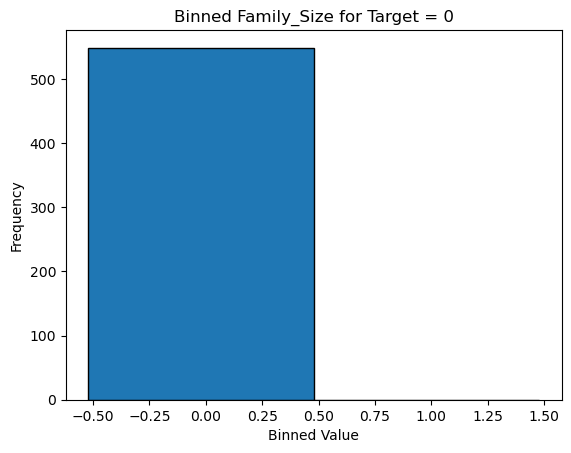

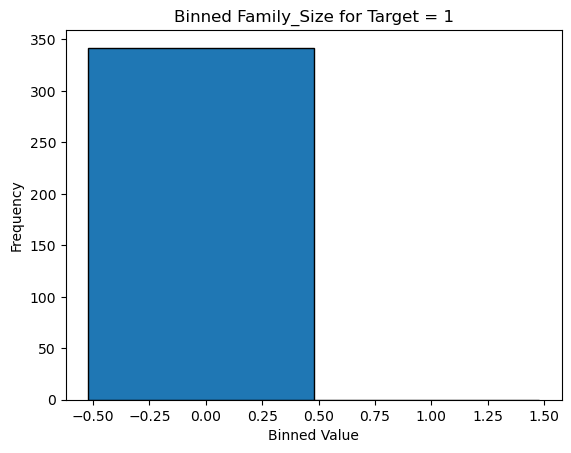

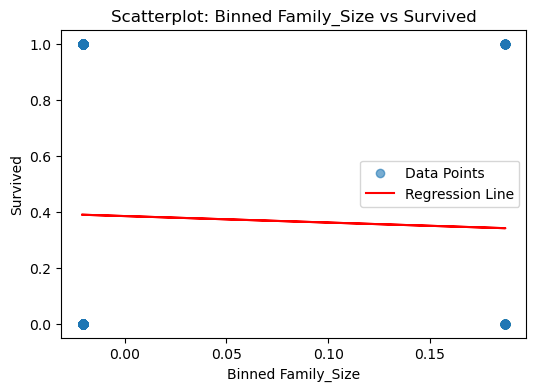

{'optimal_binning': OptimalBinning(max_n_prebins=10, min_bin_size=0.05,
                monotonic_trend='descending', prebinning_method='mdlp'),
 'mean_tau': -0.028961724240726468,
 'mean_p_value': 0.7116584986795788,
 'best_hyperparameters': {'prebinning_method': 'mdlp',
  'max_n_prebins': 10,
  'min_prebin_size': 0.05,
  'min_bin_size': 0.05,
  'monotonic_trend': 'descending'}}

In [38]:
cv_opt_bin(train_df, test_df, 'Family_Size', 'Survived', n_splits=5, random_state=42, save_binned_variable=False)

Outlier Summary for Fare: {'IQR Outliers': {'Total': 116, 'Below Median': 0, 'Above Median': 116}, 'Z-Score Outliers': {'Total': 20, 'Below Median': 0, 'Above Median': 20}}


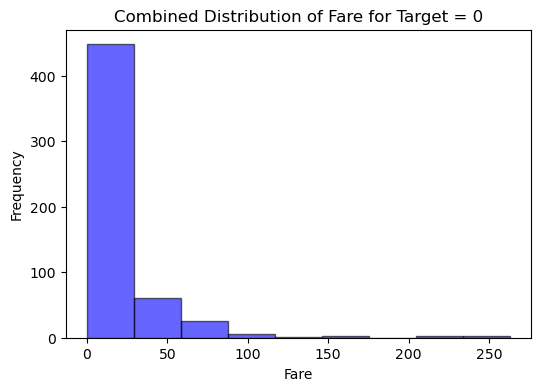

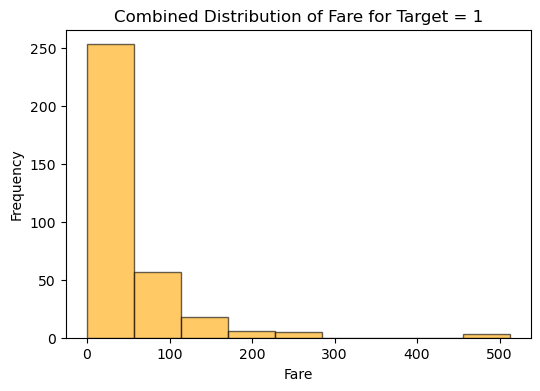

{"Mean Kendall's Tau": 0.26604539710486347,
 'Combined P-value': 3.7925575245967905e-79,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 116,
   'Below Median': 0,
   'Above Median': 116},
  'Z-Score Outliers': {'Total': 20, 'Below Median': 0, 'Above Median': 20}}}

In [39]:
cv_numeric_to_binary(train_df, 'Fare', 'Survived', n_folds=5, hist_bins=9, iqr_threshold=1.5, z_score_threshold=3)

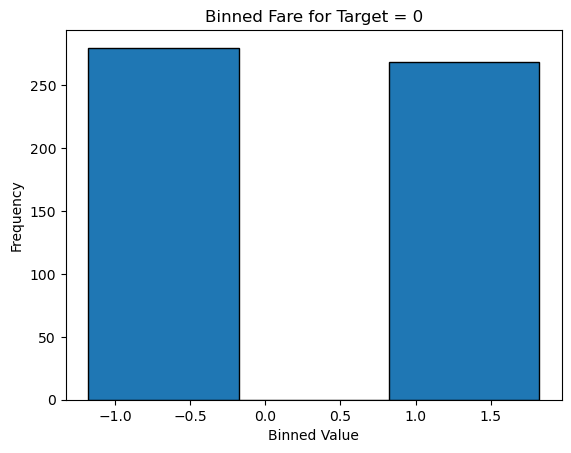

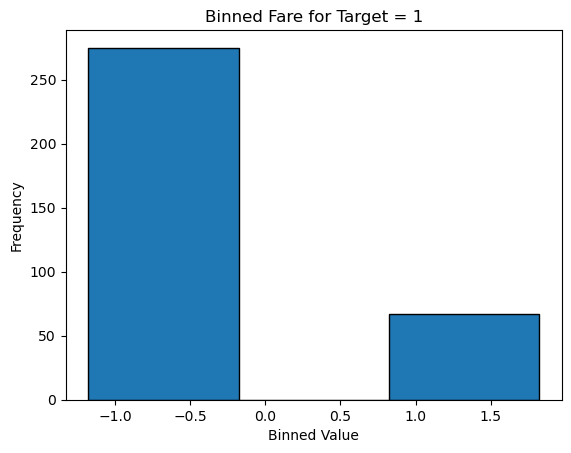

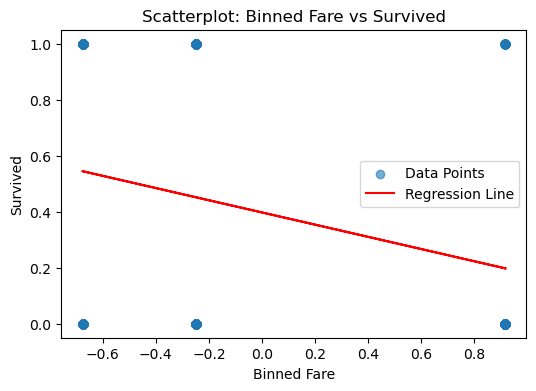

{'optimal_binning': OptimalBinning(max_n_prebins=10, min_bin_size=0.2, min_prebin_size=0.1,
                prebinning_method='mdlp'),
 'mean_tau': -0.26696983869126223,
 'mean_p_value': 0.0010176594001744675,
 'best_hyperparameters': {'prebinning_method': 'mdlp',
  'max_n_prebins': 10,
  'min_prebin_size': 0.1,
  'min_bin_size': 0.2,
  'monotonic_trend': 'auto'}}

In [40]:
cv_opt_bin(train_df, test_df, 'Fare', 'Survived', n_splits=5, random_state=42, save_binned_variable=True) ### drop the binned solution

In [41]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_1,Pclass_3,Sex_female,Sex_male,binned_SibSp,Embarked_C,Embarked_S,Family_Size,binned_Family_Size,binned_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,1.0,0.0,1.0,-0.053008,0.0,1.0,2,-0.020718,0.916731
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1.0,0.0,1.0,0.0,-0.053008,1.0,0.0,2,-0.020718,-0.676229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,1.0,1.0,0.0,-0.053008,0.0,1.0,1,-0.020718,0.916731
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1.0,0.0,1.0,0.0,-0.053008,0.0,1.0,2,-0.020718,-0.676229
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,1.0,0.0,1.0,-0.053008,0.0,1.0,1,-0.020718,0.916731


In [42]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [43]:
train_df['Title'] = train_df['Name'].str.split(pat=',', expand = True)[1].str.split(pat='.', expand = True)[0].apply(lambda x:x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=',', expand = True)[1].str.split(pat='.', expand = True)[0].apply(lambda x:x.strip())

In [44]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [45]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Miss': 'Single',
    'Mlle': 'Single',
    'Ms': 'Single',
    'Mme': 'Single'
})

test_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Miss': 'Single',
    'Mlle': 'Single',
    'Ms': 'Single',
    'Mme': 'Single'
})

In [46]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Mr,517,0.156673
4,Mrs,125,0.792000
5,Noble,5,0.600000
6,Rev,6,0.000000
7,Single,186,0.704301


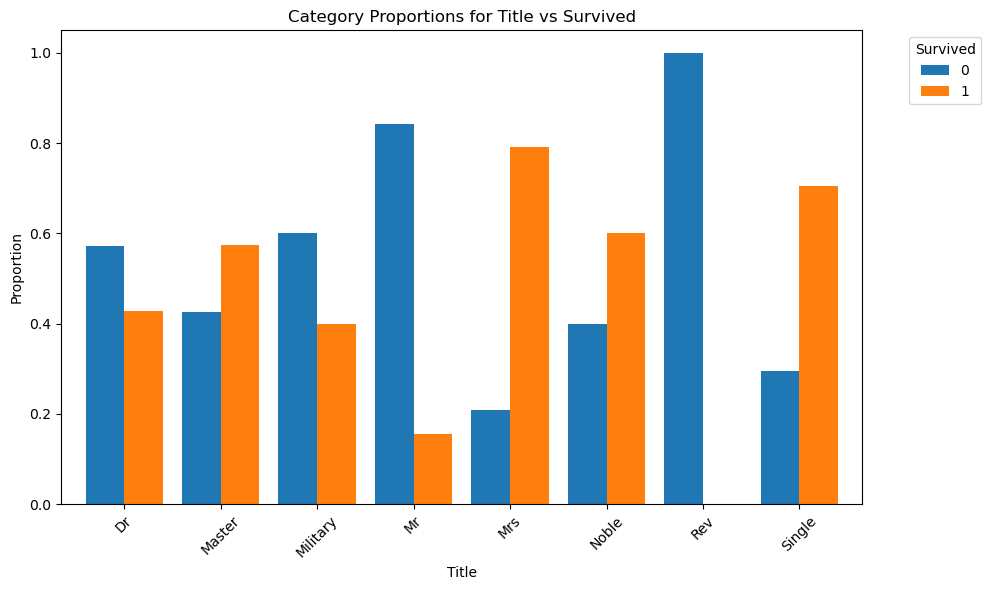

,Variable,Mean_CramersV,Mean_PValue
0,Title_Dr,NaN,5.033394e-01
1,Title_Master,0.084953,2.815237e-01
2,Title_Military,NaN,5.521579e-01
3,Title_Mr,0.549839,2.228853e-12
4,Title_Mrs,0.336686,1.409885e-04
5,Title_Noble,NaN,5.065248e-01
6,Title_Rev,NaN,6.745253e-01
7,Title_Single,0.339785,8.838186e-06


In [47]:
cv_cat_to_binary(train_df, test_df, 'Title', 'Survived', cramer_v_threshold=0.10, n_splits=5, random_state=42, save_onehotvariables=True)

In [48]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

Outlier Summary for Name_Length: {'IQR Outliers': {'Total': 55, 'Below Median': 0, 'Above Median': 55}, 'Z-Score Outliers': {'Total': 11, 'Below Median': 0, 'Above Median': 11}}


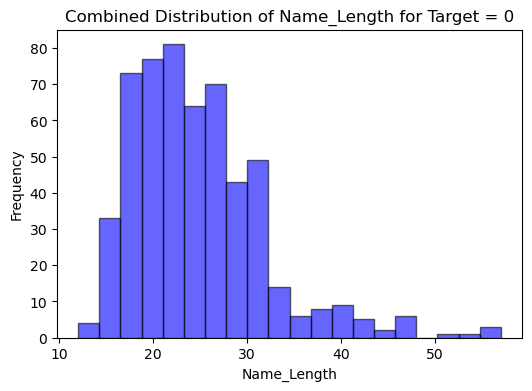

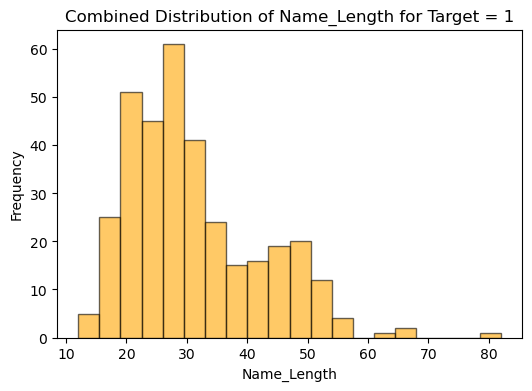

{"Mean Kendall's Tau": 0.2545606248089676,
 'Combined P-value': 1.090570280909204e-70,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 55,
   'Below Median': 0,
   'Above Median': 55},
  'Z-Score Outliers': {'Total': 11, 'Below Median': 0, 'Above Median': 11}}}

In [49]:
cv_numeric_to_binary(train_df, 'Name_Length', 'Survived', n_folds=5, hist_bins=20, iqr_threshold=1.5, z_score_threshold=3)

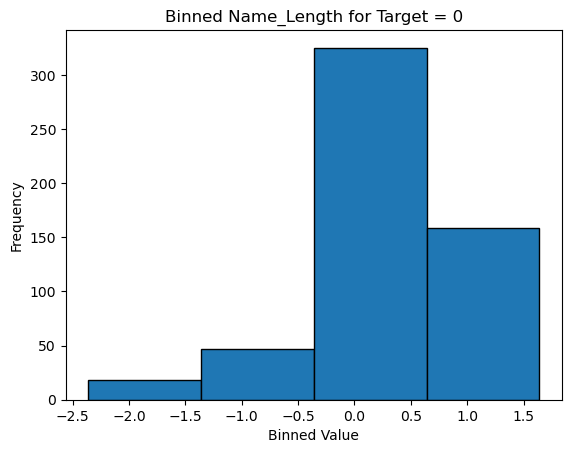

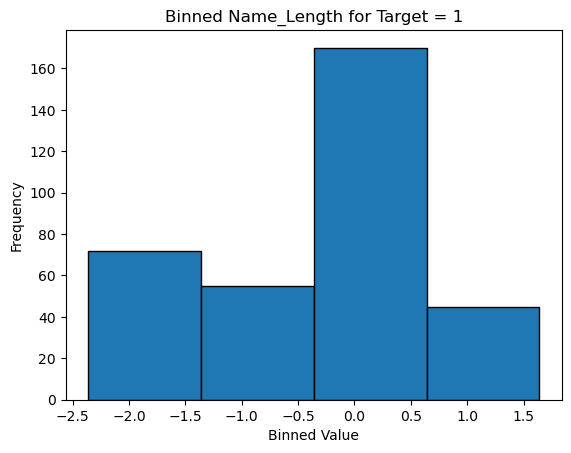

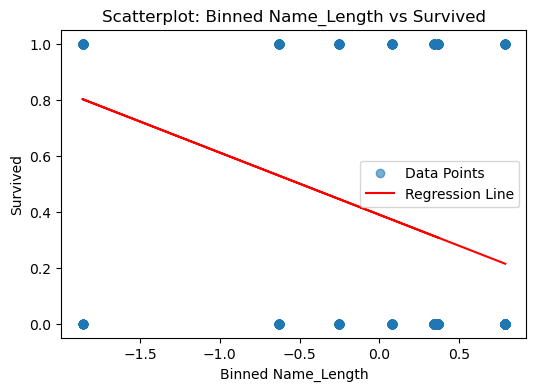

{'optimal_binning': OptimalBinning(min_bin_size=0.1),
 'mean_tau': -0.2578982432103308,
 'mean_p_value': 0.015117214547210503,
 'best_hyperparameters': {'prebinning_method': 'cart',
  'max_n_prebins': 20,
  'min_prebin_size': 0.05,
  'min_bin_size': 0.1,
  'monotonic_trend': 'auto'}}

In [50]:
cv_opt_bin(train_df, test_df, 'Name_Length', 'Survived', n_splits=5, random_state=42, save_binned_variable=True)

In [51]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [52]:
train_df.groupby(['TicketNumber'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False) 

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [53]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [54]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
4,5,10,0.000000
5,6,18,0.000000
6,7,21,0.238095


Outlier Summary for TicketNumberCounts: {'IQR Outliers': {'Total': 93, 'Below Median': 0, 'Above Median': 93}, 'Z-Score Outliers': {'Total': 39, 'Below Median': 0, 'Above Median': 39}}


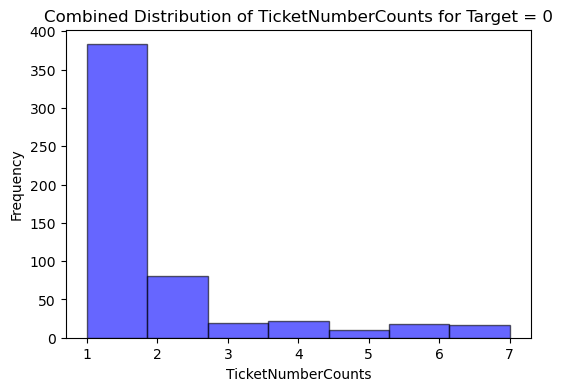

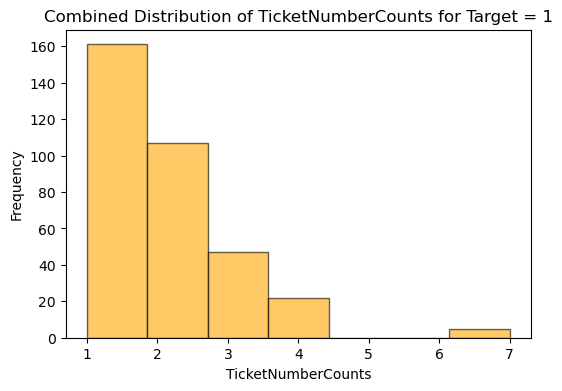

{"Mean Kendall's Tau": 0.17521924687595955,
 'Combined P-value': 1.16071924693748e-25,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 93,
   'Below Median': 0,
   'Above Median': 93},
  'Z-Score Outliers': {'Total': 39, 'Below Median': 0, 'Above Median': 39}}}

In [55]:
cv_numeric_to_binary(train_df, 'TicketNumberCounts', 'Survived', n_folds=5, hist_bins=7, iqr_threshold=1.5, z_score_threshold=3)

In [56]:
train_df['Ticket'].str.split(pat=" ", expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [57]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [58]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [59]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [60]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean']) 

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


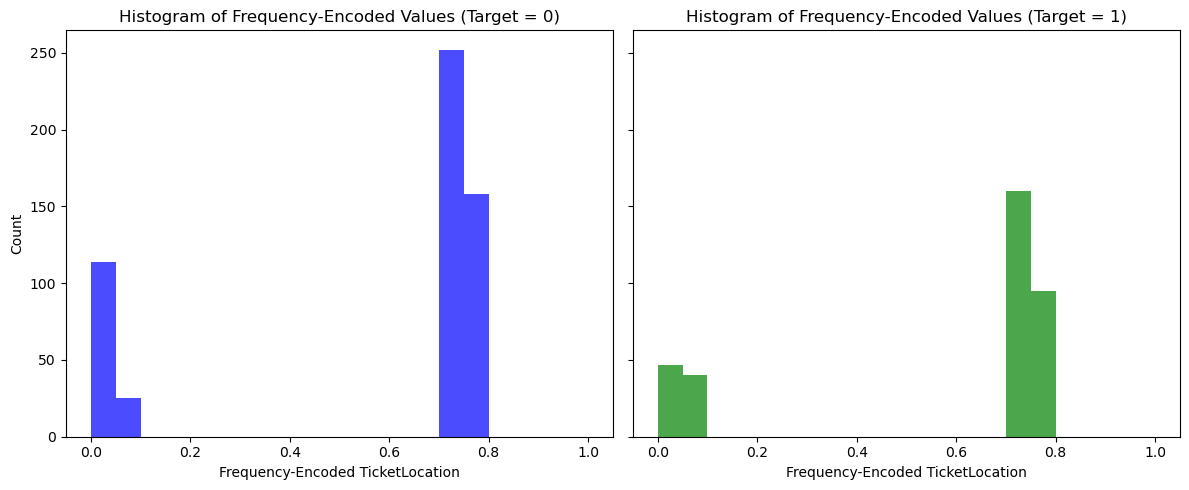

{'kendall_tau': 0.016787741361082888,
 'p_value': 0.5606432901176082,
 'histogram': <Figure size 1200x500 with 2 Axes>}

In [61]:
cv_freq_encode(train_df, 'TicketLocation', 'Survived', n_splits=5, random_state=42, save_feature=False)

In [62]:
train_df.groupby(['Cabin'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A10,1,0.0
1,A14,1,0.0
2,A16,1,1.0
3,A19,1,0.0
4,A20,1,1.0
...,...,...,...
142,F33,3,1.0
143,F38,1,0.0
144,F4,2,1.0
145,G6,4,0.5


In [63]:
# Replaces nan with U

train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [64]:
train_df.groupby(['Cabin'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


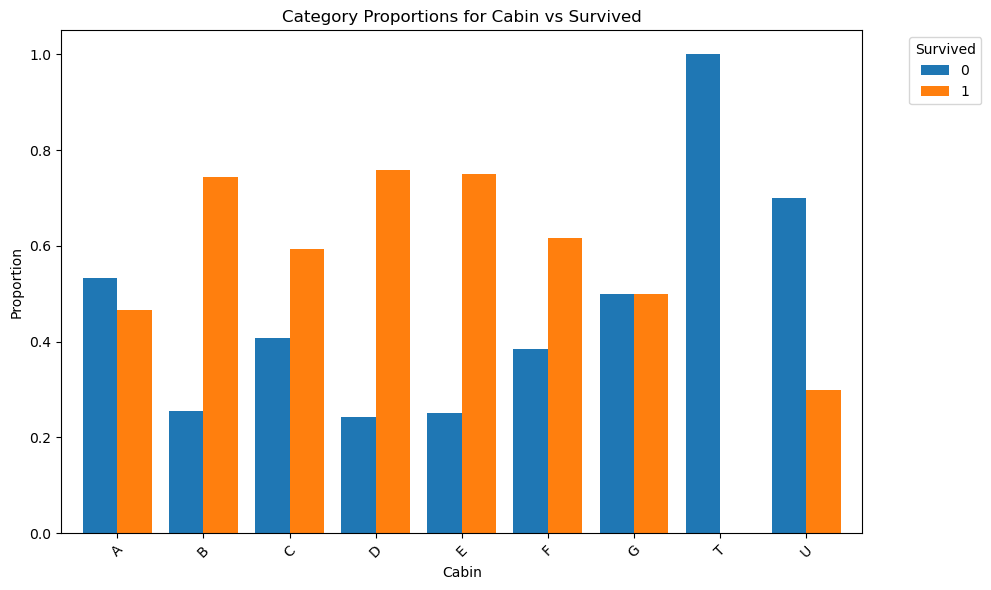

,Variable,Mean_CramersV,Mean_PValue
0,Cabin_A,0.083349,0.344729
1,Cabin_B,0.173743,0.029155
2,Cabin_C,0.113581,0.171497
3,Cabin_D,0.149879,0.066855
4,Cabin_E,0.145027,0.062503
5,Cabin_F,0.086836,0.302520
6,Cabin_G,NaN,0.893547
7,Cabin_T,NaN,0.886085
8,Cabin_U,0.316869,0.000086


In [65]:
cv_cat_to_binary(train_df, test_df, 'Cabin', 'Survived', cramer_v_threshold=0.10, n_splits=5, random_state=42, save_onehotvariables=True)

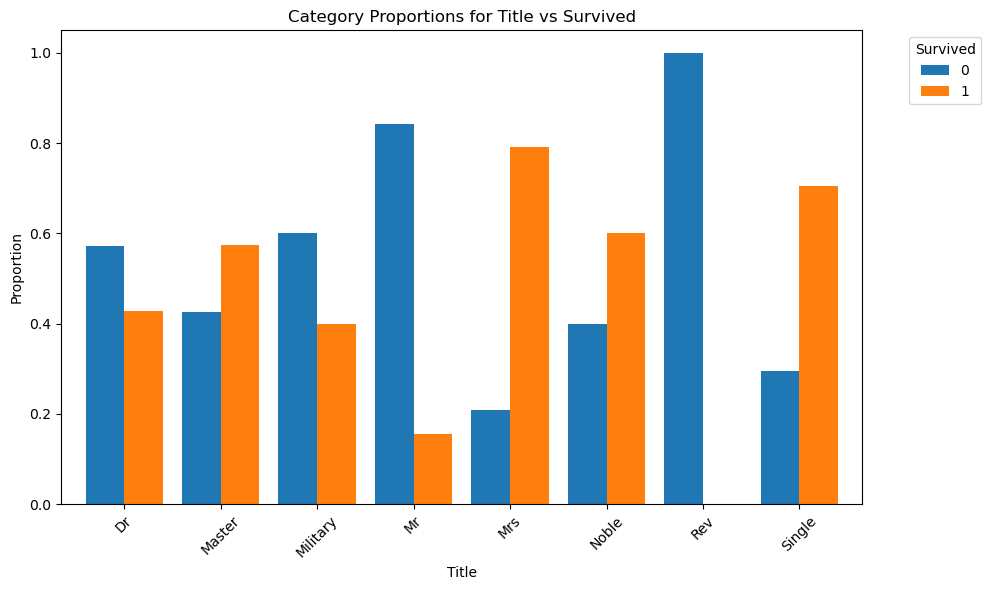

,Variable,Mean_CramersV,Mean_PValue
0,Title_Dr,NaN,5.033394e-01
1,Title_Master,0.084953,2.815237e-01
2,Title_Military,NaN,5.521579e-01
3,Title_Mr,0.549839,2.228853e-12
4,Title_Mrs,0.336686,1.409885e-04
5,Title_Noble,NaN,5.065248e-01
6,Title_Rev,NaN,6.745253e-01
7,Title_Single,0.339785,8.838186e-06


In [66]:
cv_cat_to_binary(train_df, test_df, 'Title', 'Survived', cramer_v_threshold=0.10, n_splits=5, random_state=42, save_onehotvariables=True)

In [67]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name_Length,binned_Name_Length,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,23,0.367913,21171,1,A/5,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,51,-1.859582,17599,1,PC,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,22,0.367913,3101282,1,STON/O2.,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,44,-1.859582,113803,2,Blank,0.0,1.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,24,0.345023,373450,1,Blank,0.0,0.0,0.0,0.0,1.0


In [68]:
train_df.shape

(891, 36)

In [69]:
test_df.shape

(418, 35)

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 714 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               891 non-null    object 
 11  Embarked            889 non-null    object 
 12  Pclass_1            891 non-null    float64
 13  Pclass_3            891 non-null    float64
 14  Sex_female          891 non-null    float64
 15  Sex_male            891 non-null    float64
 16  binned_S

In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    object 
 3   Sex                 418 non-null    object 
 4   Age                 332 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    object 
 8   Fare                417 non-null    float64
 9   Cabin               418 non-null    object 
 10  Embarked            418 non-null    object 
 11  Pclass_1            418 non-null    float64
 12  Pclass_3            418 non-null    float64
 13  Sex_female          418 non-null    float64
 14  Sex_male            418 non-null    float64
 15  binned_SibSp        418 non-null    float64
 16  Embarked

In [72]:
train_df['Age_Missing'] = train_df['Age'].apply(lambda x: 1 if pd.isna(x) else 0)
test_df['Age_Missing'] = test_df['Age'].apply(lambda x: 1 if pd.isna(x) else 0)

In [73]:
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [74]:
at_df = train_df.drop(['Age', 'Survived'], axis=1) 

In [75]:
### Ideally I would run a complete EDA on predictors of missing age, but time is a consideration.

In [76]:
X = at_df[['Parch', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Family_Size', 'Title_Mr', 
           'Title_Mrs', 'Title_Single', 'TicketNumberCounts', 'binned_Family_Size', 'binned_Fare', 'binned_SibSp', 
           'binned_Name_Length']]
y = at_df['Age_Missing']

In [77]:
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [78]:
interval_cols = ['Parch', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Family_Size'
                 , 'Title_Mr', 'Title_Mrs', 'Title_Single', 'TicketNumberCounts']  

In [79]:
ordinal_cols = ['binned_Family_Size', 'binned_Fare', 'binned_SibSp', 'binned_Name_Length']

In [80]:
interval_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),  
    ('scale', StandardScaler())  
])

In [81]:
ordinal_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='median')),
    ('ord', OrdinalEncoder (handle_unknown='use_encoded_value', unknown_value = -1))
])

In [82]:
col_trans = ColumnTransformer(
    transformers=[
        ('ord_pipeline', ordinal_pipeline, ordinal_cols),  # Ordinal pipeline
        ('scale_interval', interval_pipeline, interval_cols)  # Interval pipeline
    ],
    remainder='drop',  # Drop excluded columns
    n_jobs=-1
)

In [83]:
rf = RandomForestClassifier(random_state=1, n_estimators=300)

In [84]:
pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('classifier', rf)
])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('scale_interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Parch', 'Pclass_1',
                                                   'Pclass_3', 'Sex_female',
                                                   'Sex_male', 'Embarked_C',
                                                   'Embarked_S', 'Family_Size',
                                                   'Title_Mr', 'Title_Mrs',
                                                   'Title_Single',
                                                   'TicketNumberCounts'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=1))])

In [87]:
from sklearn.metrics import f1_score
y_pred = pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.3939


In [88]:
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [89]:
print(type(at_df))

<class 'pandas.core.frame.DataFrame'>


In [90]:
train_df['Age'] = train_df['Age'].fillna(pd.Series(np.random.choice(train_df['Age'].dropna(), size=train_df['Age'].isnull().sum()))) 

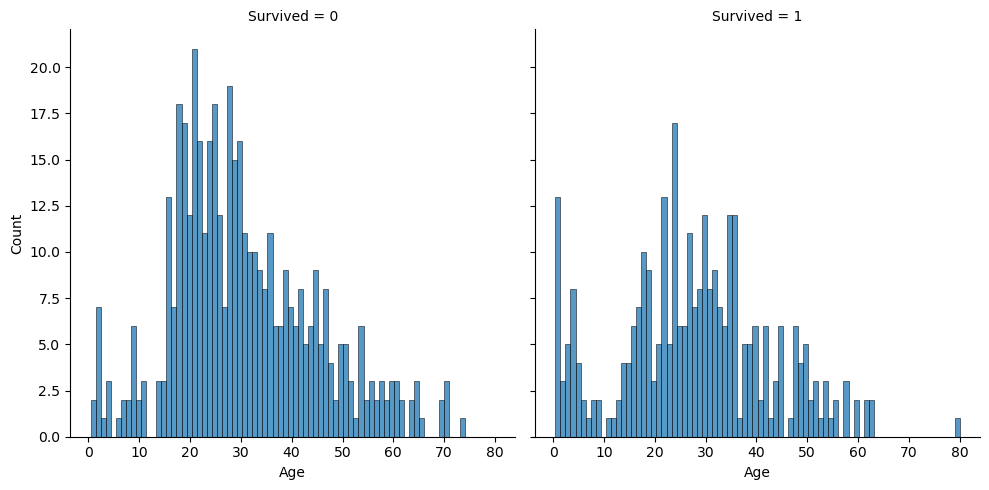

In [91]:
sns.displot(train_df, x='Age', col='Survived', binwidth=1, height=5) ### CV
plt.show()

Outlier Summary for Age: {'IQR Outliers': {'Total': 7, 'Below Median': 0, 'Above Median': 7}, 'Z-Score Outliers': {'Total': 2, 'Below Median': 0, 'Above Median': 2}}


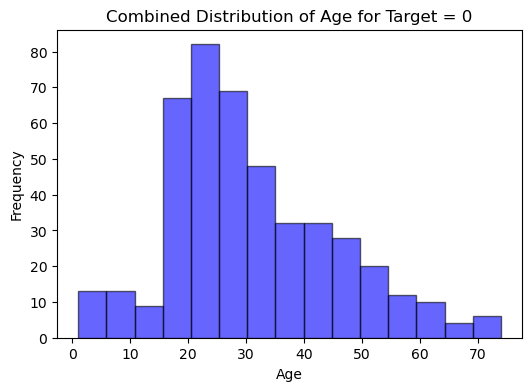

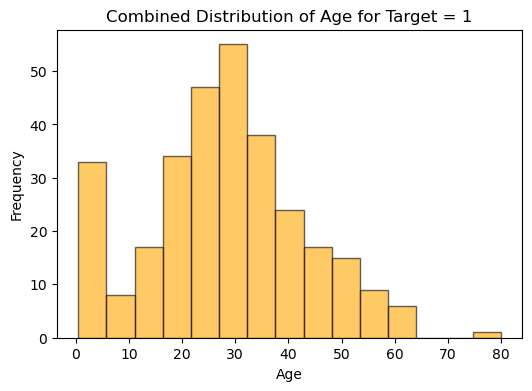

{"Mean Kendall's Tau": nan,
 'Combined P-value': nan,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 7,
   'Below Median': 0,
   'Above Median': 7},
  'Z-Score Outliers': {'Total': 2, 'Below Median': 0, 'Above Median': 2}}}

In [92]:
cv_numeric_to_binary(train_df, 'Age', 'Survived', n_folds=5, hist_bins=15, iqr_threshold=1.5, z_score_threshold=3)

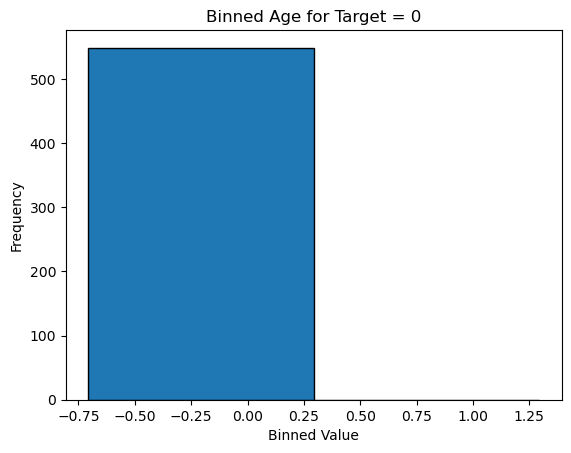

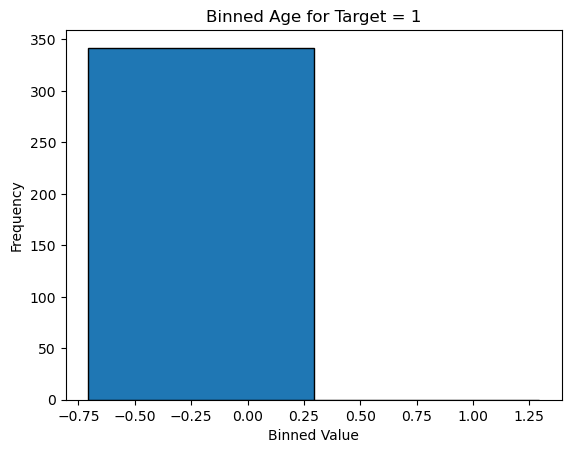

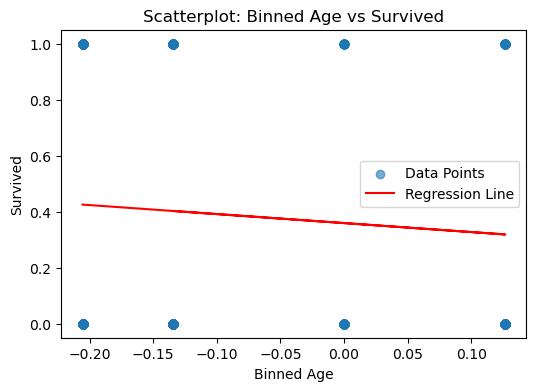

{'optimal_binning': OptimalBinning(max_n_prebins=10, min_bin_size=0.2),
 'mean_tau': 0.004458533829550506,
 'mean_p_value': 0.6879704344077245,
 'best_hyperparameters': {'prebinning_method': 'cart',
  'max_n_prebins': 10,
  'min_prebin_size': 0.05,
  'min_bin_size': 0.2,
  'monotonic_trend': 'auto'}}

In [93]:
cv_opt_bin(train_df, test_df, 'Age', 'Survived', n_splits=5, random_state=42, save_binned_variable=False)

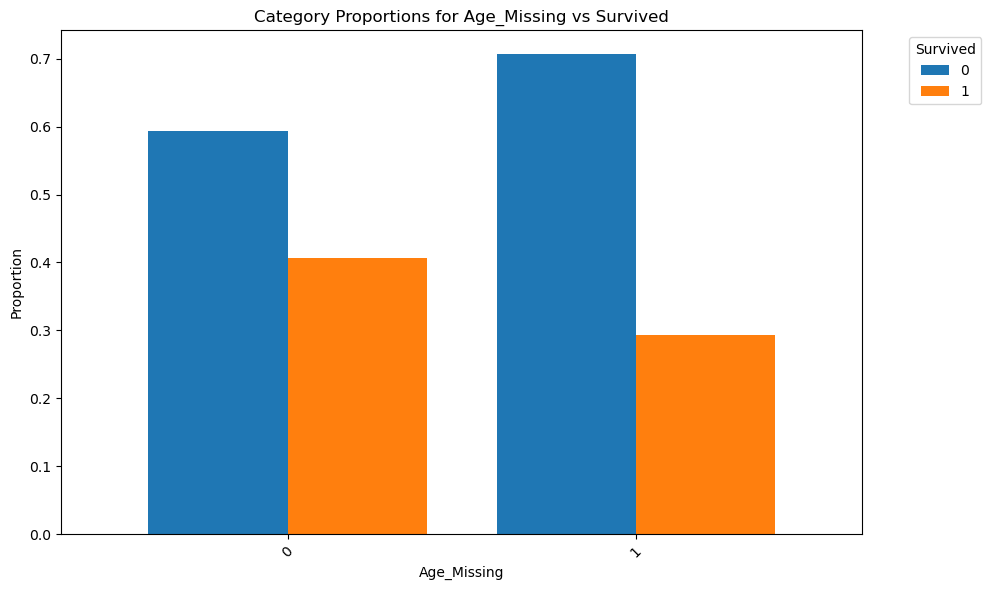

,Variable,Mean_CramersV,Mean_PValue
0,Age_Missing_0,0.087982,0.415223
1,Age_Missing_1,0.087982,0.415223


In [94]:
cv_cat_to_binary(train_df, test_df, 'Age_Missing', 'Survived', cramer_v_threshold=0.10, n_splits=5, random_state=42, save_onehotvariables=False)

In [95]:
keep = ['Survived', 'Parch', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Family_Size', 'Title_Mr', 
           'Title_Mrs', 'Title_Single', 'TicketNumberCounts', 'binned_Family_Size', 'binned_Fare', 'binned_SibSp', 
           'binned_Name_Length']

In [96]:
train_df = train_df[keep]

In [97]:
keep = ['Parch', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Family_Size', 'Title_Mr', 
           'Title_Mrs', 'Title_Single', 'TicketNumberCounts', 'binned_Family_Size', 'binned_Fare', 'binned_SibSp', 
           'binned_Name_Length']

In [98]:
test_df = test_df[keep]

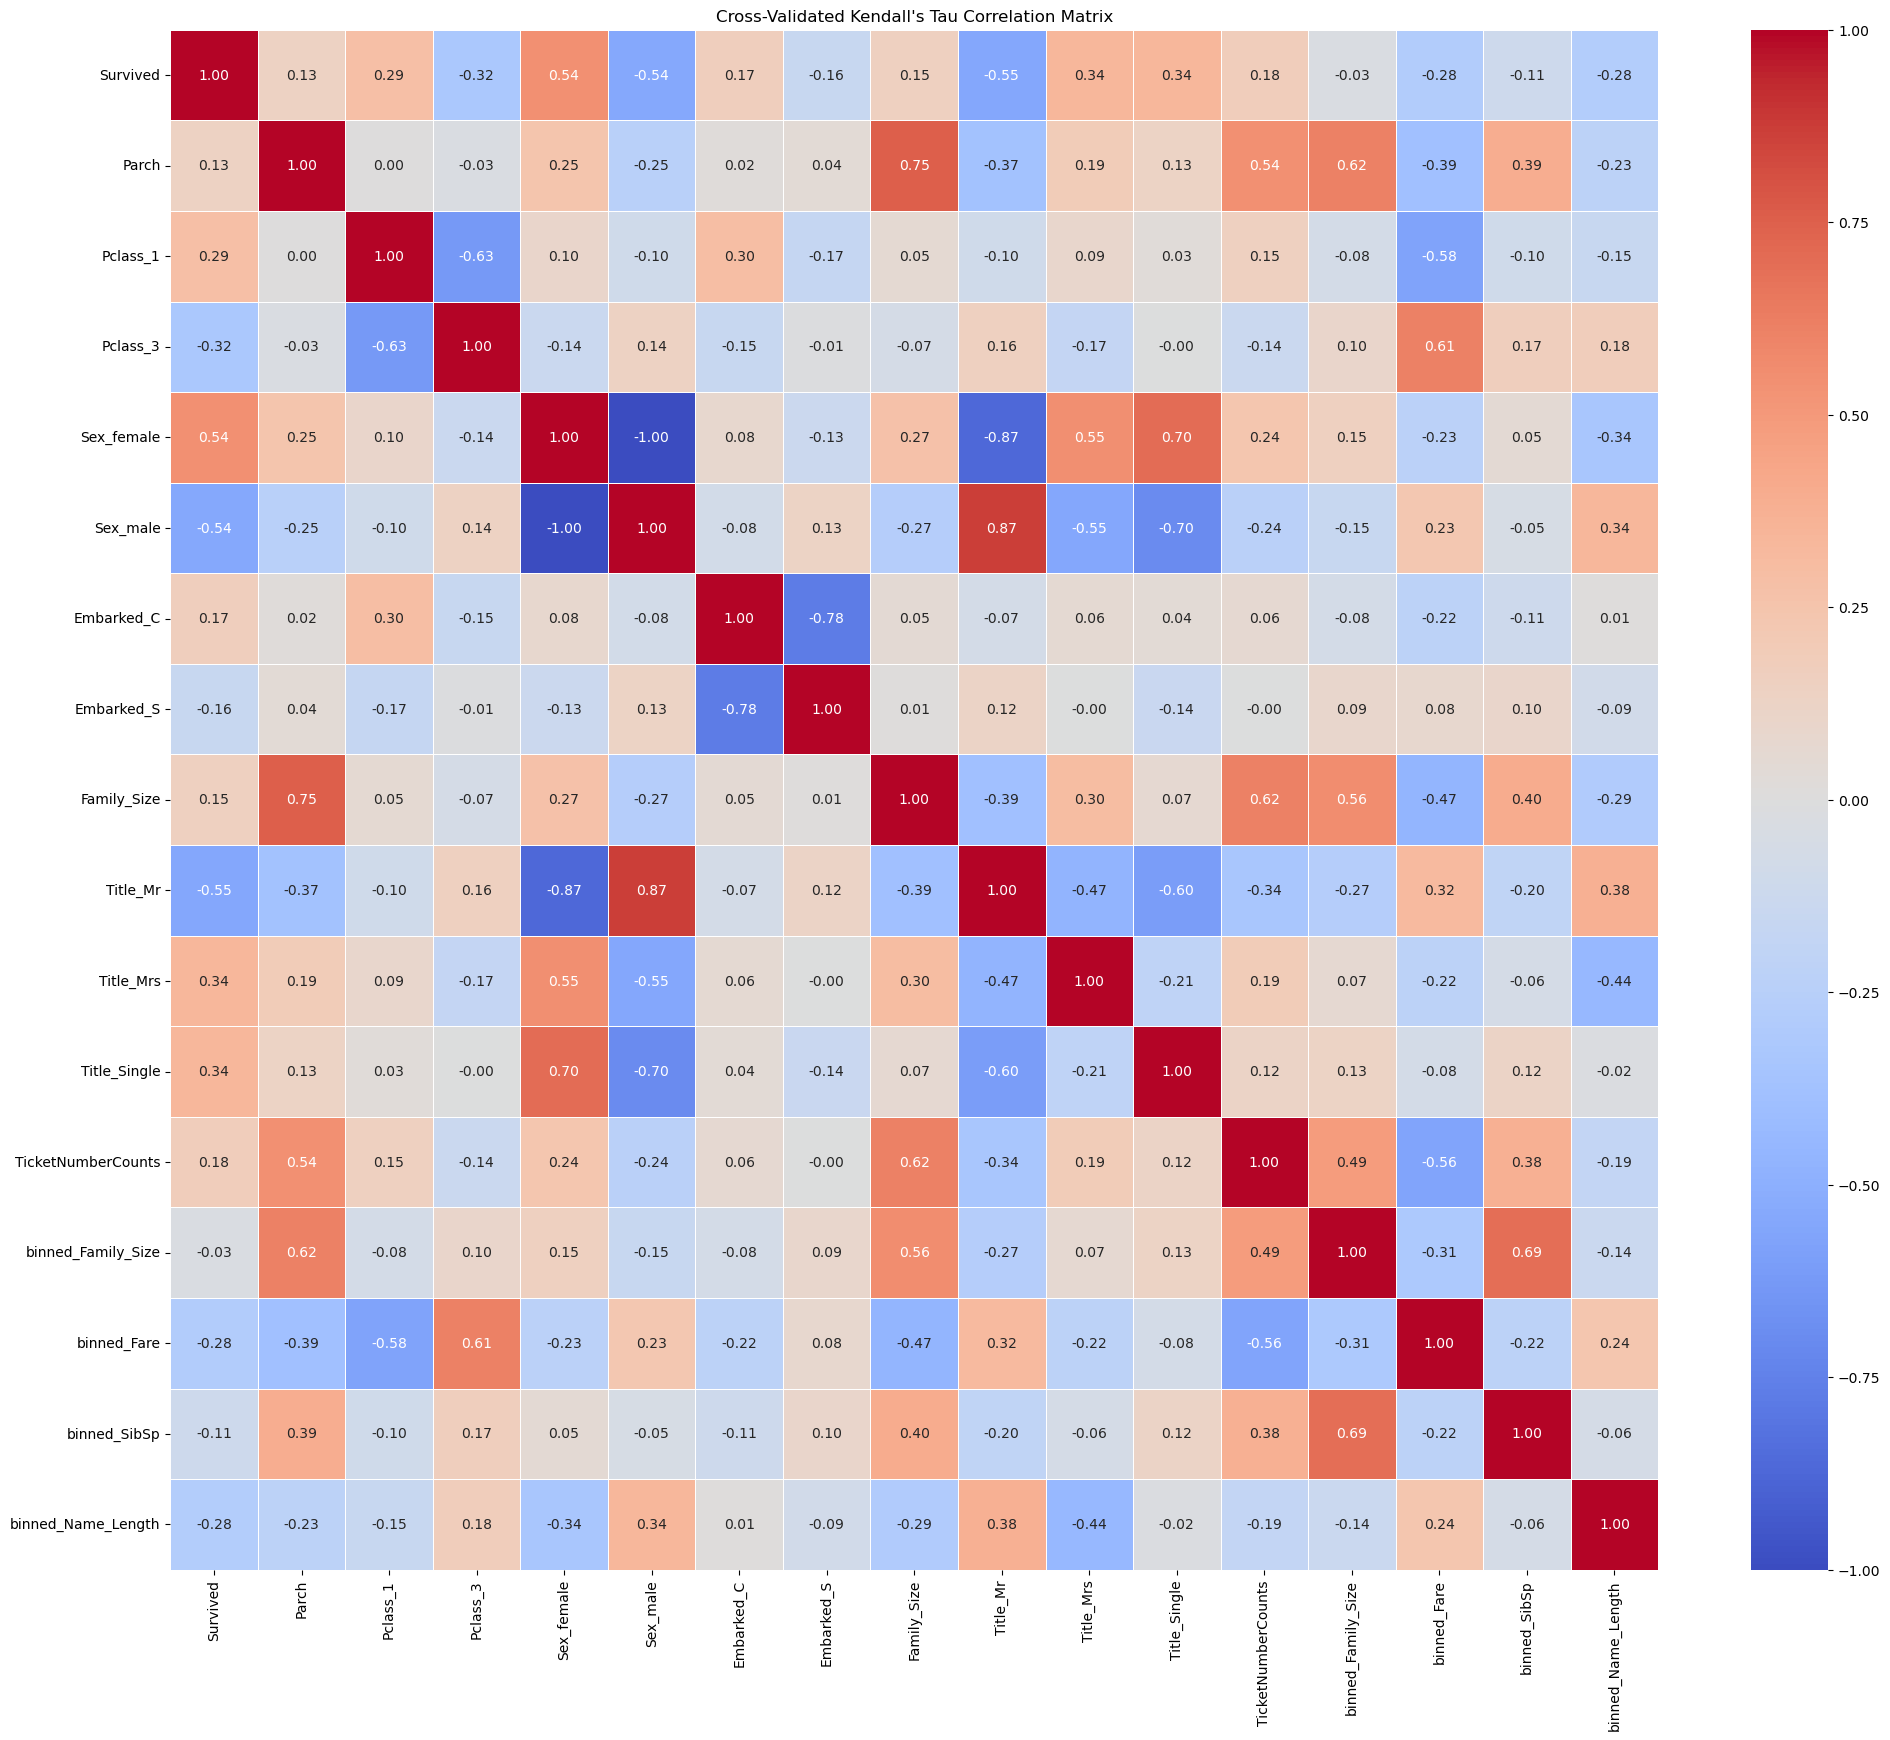

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


numeric_cols = train_df.select_dtypes(include=['number'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

correlation_matrices = []

for train_index, _ in kf.split(numeric_cols):

    train_data = numeric_cols.iloc[train_index]

    corr_matrix = train_data.corr(method='kendall')
    correlation_matrices.append(corr_matrix)

mean_correlation_matrix = np.mean(correlation_matrices, axis=0)

mean_correlation_matrix_df = pd.DataFrame(
    mean_correlation_matrix, 
    index=numeric_cols.columns, 
    columns=numeric_cols.columns
)

# Plot heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(mean_correlation_matrix_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cross-Validated Kendall's Tau Correlation Matrix")
plt.show()

In [100]:
train_df['Gender_Comp'] = train_df['Title_Mr'] + train_df['Sex_male'] - train_df['Title_Single']
test_df['Gender_Comp'] = test_df['Title_Mr'] + test_df['Sex_male'] - test_df['Title_Single']

Outlier Summary for Gender_Comp: {'IQR Outliers': {'Total': 0, 'Below Median': 0, 'Above Median': 0}, 'Z-Score Outliers': {'Total': 0, 'Below Median': 0, 'Above Median': 0}}


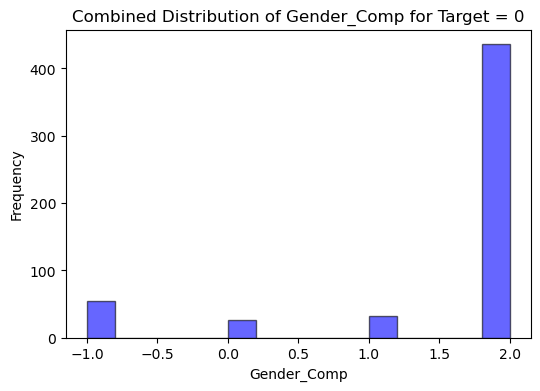

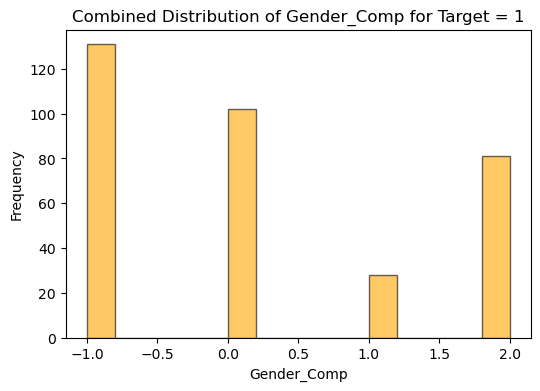

{"Mean Kendall's Tau": -0.5112551832269687,
 'Combined P-value': 3.326198121904714e-225,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 0,
   'Below Median': 0,
   'Above Median': 0},
  'Z-Score Outliers': {'Total': 0, 'Below Median': 0, 'Above Median': 0}}}

In [101]:
cv_numeric_to_binary(train_df, 'Gender_Comp', 'Survived', n_folds=5, hist_bins=15, iqr_threshold=1.5, z_score_threshold=3)

In [102]:
train_df['Par_Fam_Comp'] = train_df['Family_Size'] + train_df['Parch']
test_df['Par_Fam_Comp'] = test_df['Family_Size'] + test_df['Parch'] 

Outlier Summary for Par_Fam_Comp: {'IQR Outliers': {'Total': 56, 'Below Median': 0, 'Above Median': 56}, 'Z-Score Outliers': {'Total': 21, 'Below Median': 0, 'Above Median': 21}}


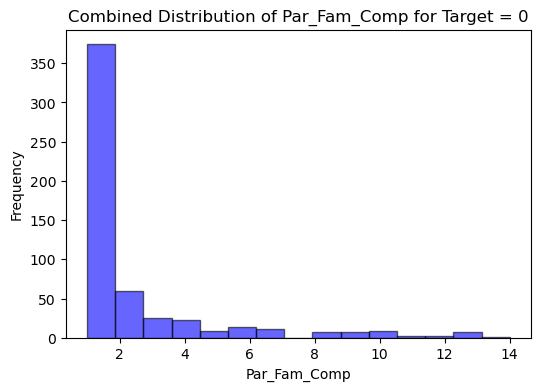

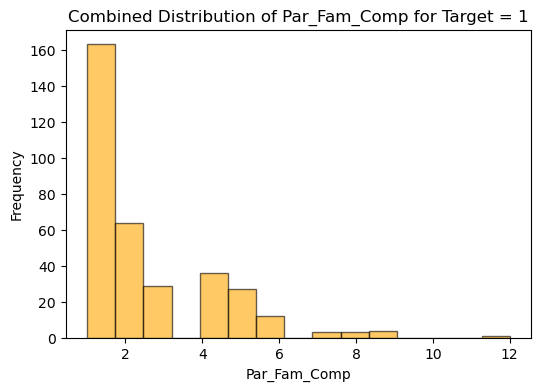

{"Mean Kendall's Tau": 0.16028963653436495,
 'Combined P-value': 3.933682153593712e-22,
 'Interpretation Guidelines': ['< 0.1 = Very Weak Association',
  '0.0 - 0.3 = Weak Association',
  '0.3 - 0.5 = Moderate Association',
  '> 0.5 = Strong Association'],
 'Outlier Summary': {'IQR Outliers': {'Total': 56,
   'Below Median': 0,
   'Above Median': 56},
  'Z-Score Outliers': {'Total': 21, 'Below Median': 0, 'Above Median': 21}}}

In [103]:
cv_numeric_to_binary(train_df, 'Par_Fam_Comp', 'Survived', n_folds=5, hist_bins=15, iqr_threshold=1.5, z_score_threshold=3)

In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Parch               891 non-null    int64  
 2   Pclass_1            891 non-null    float64
 3   Pclass_3            891 non-null    float64
 4   Sex_female          891 non-null    float64
 5   Sex_male            891 non-null    float64
 6   Embarked_C          891 non-null    float64
 7   Embarked_S          891 non-null    float64
 8   Family_Size         891 non-null    int64  
 9   Title_Mr            891 non-null    float64
 10  Title_Mrs           891 non-null    float64
 11  Title_Single        891 non-null    float64
 12  TicketNumberCounts  891 non-null    int64  
 13  binned_Family_Size  891 non-null    float64
 14  binned_Fare         891 non-null    float64
 15  binned_SibSp        891 non-null    float64
 16  binned_N

In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Parch               418 non-null    int64  
 1   Pclass_1            418 non-null    float64
 2   Pclass_3            418 non-null    float64
 3   Sex_female          418 non-null    float64
 4   Sex_male            418 non-null    float64
 5   Embarked_C          418 non-null    float64
 6   Embarked_S          418 non-null    float64
 7   Family_Size         418 non-null    int64  
 8   Title_Mr            418 non-null    float64
 9   Title_Mrs           418 non-null    float64
 10  Title_Single        418 non-null    float64
 11  TicketNumberCounts  418 non-null    int64  
 12  binned_Family_Size  418 non-null    float64
 13  binned_Fare         418 non-null    float64
 14  binned_SibSp        418 non-null    float64
 15  binned_Name_Length  418 non-null    float64
 16  Gender_C

In [106]:
y = train_df['Survived']
X = train_df.drop(['Family_Size', 'Parch', 'Title_Mr', 'Sex_male', 'Title_Single', 'Survived'], axis=1, errors='ignore')
x_test = test_df.drop(['Family_Size', 'Parch', 'Title_Mr', 'Sex_male', 'Title_Single'], axis=1, errors='ignore')

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

In [108]:
ordinal_columns = ['binned_Family_Size', 'binned_Fare', 'binned_SibSp', 'binned_Name_Length']
interval_columns = ['TicketNumberCounts', 'Gender_Comp', 'Par_Fam_Comp']
passthrough_columns = ['Pclass_1', 'Pclass_3', 'Sex_female', 'Embarked_C', 'Embarked_S', 'Title_Mrs']

In [109]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [110]:
interval_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

In [111]:
col_trans = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_pipeline, ordinal_columns),
        ('interval', interval_pipeline, interval_columns),
        ('passthrough', 'passthrough', passthrough_columns)
    ],
    remainder='drop',  # Drop any columns not specified
    n_jobs=-1  # Parallelize transformations
)

In [112]:
rfc = RandomForestClassifier()

In [113]:
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150],
    'min_samples_split': [13, 14, 15, 16, 17],
    'max_depth': [6, 7, 8, 9, 10],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [114]:
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [115]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Tic...
                                                   'Sex_female', 'Embarked_C',
                                                   'Embarked_S',
                                                   'Title_Mrs'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [6, 7, 8, 9, 10],
                                          'min_samples_leaf': [2, 3, 4, 5, 6],
                                          'min_samples_split': [13, 14, 15, 16,
                                                                17],
                                          'n_estimators': [50, 75, 100, 125,
                                                           150]}))])

In [116]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_) # {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 100} 0.8230276765488034

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 14, 'n_estimators': 50}
0.8272530286614794


In [117]:
rfc_train_predictions = pipefinalrfc.predict(X_train)
train_pred_rfc_df = pd.DataFrame(rfc_train_predictions, columns=["RFC_Predictions"], index=X_train.index)
X_train_with_preds = pd.concat([X_train, train_pred_rfc_df], axis=1)

In [118]:
dtc = DecisionTreeClassifier(random_state=1)

In [119]:
param_grid = {
    'min_samples_split': [13, 14, 15, 16, 17, 18], 
    'max_depth': [8, 9, 10, 11, 12, 13],
    'min_samples_leaf': [3, 4, 5, 6], 
    'criterion': ['gini', 'entropy'],
}

In [120]:
CV_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [121]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Tic...
                                                  ['Pclass_1', 'Pclass_3',
                                                   'Sex_female', 'Embarked_C',
                                                   'Embarked_S',
                                                   'Title_Mrs'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(random_state=1),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 11, 12, 13],
                                          'min_samples_leaf': [3, 4, 5, 6],
                                          'min_samples_split': [13, 14, 15, 16,
                                                                17, 18]}))])

In [122]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_) #{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 15}0.8286220821432089

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 14}
0.8286220821432089


In [123]:
dtc_train_predictions = pipefinaldtc.predict(X_train)
train_pred_dtc_df = pd.DataFrame(dtc_train_predictions, columns=["DTC_Predictions"], index=X_train.index)
X_train_with_preds = pd.concat([X_train_with_preds, train_pred_dtc_df], axis=1)

In [124]:
knn = KNeighborsClassifier(n_jobs=-1)

In [125]:
param_grid = {
    'n_neighbors': [8, 9, 10, 11, 12],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree',  'kd_tree', 'brute'],
    'p': [1, 2],
}

In [126]:
CV_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [127]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Tic...
                                                  ['Pclass_1', 'Pclass_3',
                                                   'Sex_female', 'Embarked_C',
                                                   'Embarked_S',
                                                   'Title_Mrs'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(n_jobs=-1),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [8, 9, 10, 11, 12],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [128]:
print(CV_knn.best_params_)
print(CV_knn.best_score_) ### {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}0.810400866738895

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.810400866738895


In [129]:
knn_train_predictions = pipefinalknn.predict(X_train)
train_pred_knn_df = pd.DataFrame(knn_train_predictions, columns=["KNN_Predictions"], index=X_train.index)
X_train_with_preds = pd.concat([X_train_with_preds, train_pred_knn_df], axis=1)

In [130]:
svc = SVC(random_state=1)

In [131]:
param_grid = {
    'C': [1.25, 1.5, 2.0, 2.25, 2.50], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

In [132]:
CV_SVC = GridSearchCV(estimator = svc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [133]:
pipefinalsvc = make_pipeline(col_trans, CV_SVC)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Tic...',
                                                   'Gender_Comp',
                                                   'Par_Fam_Comp']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass_1', 'Pclass_3',
                                                   'Sex_female', 'Embarked_C',
                                                   'Embarked_S',
                                                   'Title_Mrs'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(random_state=1),
                              param_grid={'C': [1.25, 1.5, 2.0, 2.25, 2.5],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [134]:
print(CV_SVC.best_params_)
print(CV_SVC.best_score_) # {'C': 2.25, 'kernel': 'poly'} 0.8174135723431497

{'C': 2.25, 'kernel': 'poly'}
0.8174135723431497


In [135]:
svc_train_predictions = pipefinalsvc.predict(X_train)
train_pred_svc_df = pd.DataFrame(svc_train_predictions, columns=["SVC_Predictions"], index=X_train.index)
X_train_with_preds = pd.concat([X_train_with_preds, train_pred_svc_df], axis=1)

In [136]:
lr = LogisticRegression(random_state=1, n_jobs=-1)

In [137]:
param_grid = {
    'C': [2.00, 1.75, 1.5, 1.25, 1.125, 1.0, 0.1]  
}

In [138]:
CV_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [139]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Tic...erCounts',
                                                   'Gender_Comp',
                                                   'Par_Fam_Comp']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass_1', 'Pclass_3',
                                                   'Sex_female', 'Embarked_C',
                                                   'Embarked_S',
                                                   'Title_Mrs'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(n_jobs=-1,
                                                           random_state=1),
                              param_grid={'C': [2.0, 1.75, 1.5, 1.25, 1.125,
                                                1.0, 0.1]}))])

In [140]:
print(CV_lr.best_params_)
print(CV_lr.best_score_) # {'C': 1.5} 0.7991332611050921

{'C': 1.5}
0.7991332611050921


In [141]:
lg_train_predictions = pipefinallr.predict(X_train)
train_pred_lg_df = pd.DataFrame(lg_train_predictions, columns=["lg_Predictions"], index=X_train.index)
X_train_with_preds = pd.concat([X_train_with_preds, train_pred_lg_df], axis=1)

In [142]:
gaus = GaussianNB()

In [143]:
param_grid = {
    'var_smoothing': [0.0000075, 0.0000001, 0.000000125],
}

In [144]:
CV_gnb = GridSearchCV(estimator = gaus, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [145]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['TicketNumberCounts',
                                                   'Gender_Comp',
                                                   'Par_Fam_Comp']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass_1', 'Pclass_3',
                                                   'Sex_female', 'Embarked_C',
                                                   'Embarked_S',
                                                   'Title_Mrs'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [7.5e-06, 1e-07,
                                                            1.25e-07]}))])

In [146]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_) # {'var_smoothing': 7.5e-06} 0.7907318034078598

{'var_smoothing': 7.5e-06}
0.7907318034078598


In [147]:
gnb_train_predictions = pipefinalgnb.predict(X_train)
train_pred_gnb_df = pd.DataFrame(gnb_train_predictions, columns=["gnb_Predictions"], index=X_train.index)
X_train_with_preds = pd.concat([X_train_with_preds, train_pred_gnb_df], axis=1)

In [148]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_with_preds, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [149]:
xg = XGBClassifier(random_state=1, n_jobs=-1)

In [150]:
param_grid = {
    'booster': ['gbtree', 'gblinear', 'dart'],
}

In [151]:
CV_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [152]:
pipefinalxg = make_pipeline(col_trans, CV_xg)
pipefinalxg.fit(X_train_with_preds, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  ['binned_Family_Size',
                                                   'binned_Fare',
                                                   'binned_SibSp',
                                                   'binned_Name_Length']),
                                                 ('interval',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Tic...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      random_state=1, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart']}))])

In [153]:
print(CV_xg.best_params_)
print(CV_xg.best_score_) # {'booster': 'gblinear'} 0.8005417118093174

{'booster': 'gblinear'}
0.7977346597064906


In [154]:
xg_train_predictions = pipefinalgnb.predict(X_train_with_preds)
train_pred_xg_df = pd.DataFrame(xg_train_predictions, columns=["xg_Predictions"], index=X_train_with_preds.index)
X_train_with_preds = pd.concat([X_train_with_preds, train_pred_xg_df], axis=1)

In [155]:
X_train_with_preds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 67 to 206
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass_1            712 non-null    float64
 1   Pclass_3            712 non-null    float64
 2   Sex_female          712 non-null    float64
 3   Embarked_C          712 non-null    float64
 4   Embarked_S          712 non-null    float64
 5   Title_Mrs           712 non-null    float64
 6   TicketNumberCounts  712 non-null    int64  
 7   binned_Family_Size  712 non-null    float64
 8   binned_Fare         712 non-null    float64
 9   binned_SibSp        712 non-null    float64
 10  binned_Name_Length  712 non-null    float64
 11  Gender_Comp         712 non-null    float64
 12  Par_Fam_Comp        712 non-null    int64  
 13  RFC_Predictions     712 non-null    int64  
 14  DTC_Predictions     712 non-null    int64  
 15  KNN_Predictions     712 non-null    int64  
 16  SVC_Predicti

In [156]:
pred_columns = ['RFC_Predictions', 'DTC_Predictions', 'KNN_Predictions', 'SVC_Predictions', 'lg_Predictions', 'gnb_Predictions', 
                      'xg_Predictions']

In [157]:
pred_df = X_train_with_preds[pred_columns]

In [158]:
spearman_corr = pred_df.corr(method='spearman')

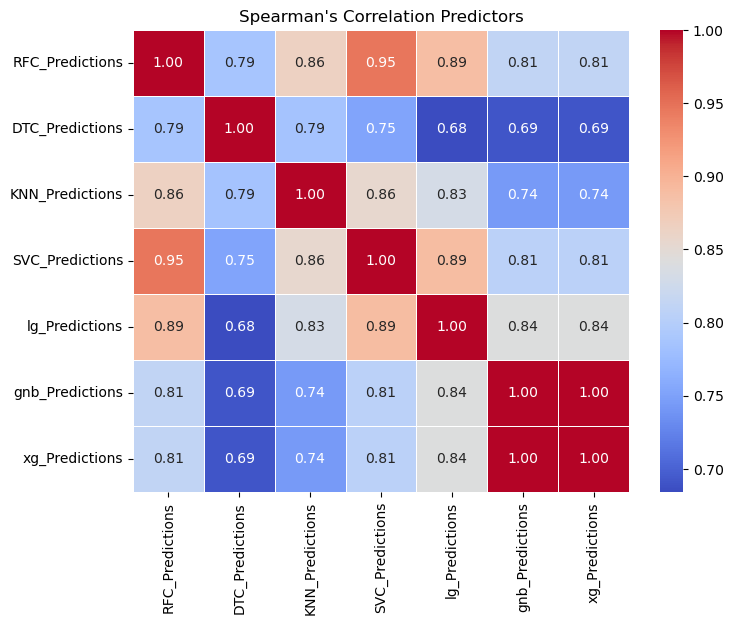

In [159]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)

plt.title("Spearman's Correlation Predictors")
plt.show()

In [160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 67 to 206
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass_1            712 non-null    float64
 1   Pclass_3            712 non-null    float64
 2   Sex_female          712 non-null    float64
 3   Embarked_C          712 non-null    float64
 4   Embarked_S          712 non-null    float64
 5   Title_Mrs           712 non-null    float64
 6   TicketNumberCounts  712 non-null    int64  
 7   binned_Family_Size  712 non-null    float64
 8   binned_Fare         712 non-null    float64
 9   binned_SibSp        712 non-null    float64
 10  binned_Name_Length  712 non-null    float64
 11  Gender_Comp         712 non-null    float64
 12  Par_Fam_Comp        712 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 77.9 KB


In [161]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [162]:
X, y = make_classification(
    n_samples=1000, n_features=12, n_informative=8, n_redundant=4, random_state=42
)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [164]:
base_models = [
    ('rfc', RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=42)),
    ('dtc', DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=6, min_samples_split=15, random_state=42)),
    ('knn', KNeighborsClassifier(algorithm='ball_tree', n_neighbors= 9, p= 1, weights='uniform')),
    ('svc', SVC(C=2.25, kernel='poly', probability=True)),
    ('lr', LogisticRegression(C= 1.5, random_state = 42)),
]

In [165]:
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

In [166]:
stacking_clf = StackingClassifier(
    estimators=base_models,        # Base learners
    final_estimator=meta_learner,  # Meta-learner
    cv=5                           # Cross-validation for training base models
)

In [167]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rfc',
                                RandomForestClassifier(max_depth=8,
                                                       min_samples_leaf=4,
                                                       min_samples_split=15,
                                                       random_state=42)),
                               ('dtc',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=6,
                                                       min_samples_split=15,
                                                       random_state=42)),
                               ('knn',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     n_neighbors=9, p=1)),
                               ('svc',
                                SVC(C=2.25, kernel='poly', probability=True)),
                               ('lr',
                                LogisticRegression(C=1.5, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42))

In [168]:
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [169]:
print("Stacking Ensemble Accuracy:", accuracy)

Stacking Ensemble Accuracy: 0.915


In [170]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [171]:
X, y = make_classification(
    n_samples=1000, n_features=12, n_informative=8, n_redundant=4, n_repeated=0, random_state=42
)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
X_blend_train, X_blend_val, y_blend_train, y_blend_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

In [174]:
model1 = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=42).fit(X_blend_train, y_blend_train)
model2 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=6, min_samples_split=15, random_state=42).fit(X_blend_train, y_blend_train)
model3 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors= 9, p= 1, weights='uniform').fit(X_blend_train, y_blend_train)
model4 = SVC(C=2.25, kernel='poly', probability=True).fit(X_blend_train, y_blend_train)
model5 = LogisticRegression(C= 1.5, random_state = 42).fit(X_blend_train, y_blend_train)

In [175]:
pred1 = model1.predict_proba(X_blend_val)[:, 1]  
pred2 = model2.predict_proba(X_blend_val)[:, 1]  
pred3 = model3.predict_proba(X_blend_val)[:, 1]
pred4 = model5.predict_proba(X_blend_val)[:, 1]
pred5 = model5.predict_proba(X_blend_val)[:, 1]

In [176]:
blend_features = np.column_stack((pred1, pred2, pred3, pred4, pred5))

In [177]:
meta_model = LogisticRegression(random_state=42)
meta_model.fit(blend_features, y_blend_val)

LogisticRegression(random_state=42)

In [178]:
test_pred1 = model1.predict_proba(X_blend_val)[:, 1]  
test_pred2 = model2.predict_proba(X_blend_val)[:, 1]  
test_pred3 = model3.predict_proba(X_blend_val)[:, 1]
test_pred4 = model5.predict_proba(X_blend_val)[:, 1]
test_pred5 = model5.predict_proba(X_blend_val)[:, 1]

In [179]:
final_features = np.column_stack((test_pred1, test_pred2, test_pred3, test_pred4, test_pred5))

In [180]:
final_predictions = meta_model.predict(final_features)

In [181]:
y_pred = meta_model.predict(final_features)

In [182]:
accuracy = accuracy_score(y_test, final_predictions)
print("Blending Accuracy:", accuracy) ### Abysmal

Blending Accuracy: 0.53


In [183]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [184]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42
)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
model1 = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=4, min_samples_split=15, n_estimators=100, random_state=42)
model2 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=6, min_samples_split=15, random_state=42)
model3 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors= 9, p= 1, weights='uniform')
model4 = SVC(C=2.25, kernel='poly', probability=True)
model5 = LogisticRegression(C= 1.5, random_state = 42)

In [187]:
voting_clf = VotingClassifier(
    estimators=[('rfc', model1), ('dt', model2), ('knn', model3), ('svc', model4), ('lr', model4)],
    voting='soft'  # 'hard' for majority vote, 'soft' for weighted probabilities
)

In [188]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(max_depth=8,
                                                     min_samples_leaf=4,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=6,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_neighbors=9, p=1)),
                             ('svc',
                              SVC(C=2.25, kernel='poly', probability=True)),
                             ('lr',
                              SVC(C=2.25, kernel='poly', probability=True))],
                 voting='soft')

In [189]:
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.915


In [ ]:
submission.to_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//pred.csv', index = False)
submission2.to_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//pred2.csv', index = False)
submission3.to_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//pred3.csv', index = False)
submission4.to_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//pred4.csv', index = False)
submission5.to_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//pred5.csv', index = False)
submission6.to_csv('C://Users//jesse//OneDrive//Desktop//Portfolio//Titanic//pred6.csv', index = False)